# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ramadhan Oktovivian Muhammad
- **Email:** vianokto30@gmail.com
- **ID Dicoding:** okto_vivian

## Menentukan Pertanyaan Bisnis

1. 5 Barang terbanyak apakah yang dibeli di semua state dalam rentang musim hujan dan kemarau?
2. 5 Barang terbanyak apakah yang terjual dari semua state dalam rentang musim hujan dan kemarau?
3. Berapa pengeluaran seluruh state pada musim hujan dan kemarau?

#### Import Semua Packagaes/Library yang Digunakan

In [87]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle #unsued
import seaborn as sns

 

#### Data Wragling

##### Gathering Data
* Pendefinisian Path File: Skrip ini mendefinisikan lokasi (path) dari berbagai dataset CSV, yang disimpan dalam sebuah dictionary bernama file_paths.
* Memuat Data: Setiap file CSV dimuat ke dalam DataFrame Pandas (misalnya, customers_df, orders_df).
* Verifikasi Ukuran Data: Skrip kemudian melakukan looping untuk setiap DataFrame dan mencetak ukurannya, untuk memastikan jumlah baris dan kolom yang dimuat sudah benar.


In [88]:

# Define file paths
#relative path
file_paths = {
    'customers': r'Submission\Data\customers_dataset.csv',
    'geolocation': r'Submission\Data\geolocation_dataset.csv',
    'order_items': r'Submission\Data\order_items_dataset.csv',
    'order_payments': r'Submission\Data\order_payments_dataset.csv',
    'order_reviews': r'Submission\Data\order_reviews_dataset.csv',
    'orders': r'Submission\Data\orders_dataset.csv',
    'product_category_translation': r'Submission\Data\product_category_name_translation.csv',
    'products': r'Submission\Data\products_dataset.csv',
    'sellers': r'Submission\Data\sellers_dataset.csv'
}

#local path
# file_paths = {
#     'customers': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\customers_dataset.csv',
#     'geolocation': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\geolocation_dataset.csv',
#     'order_items': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\order_items_dataset.csv',
#     'order_payments': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\order_payments_dataset.csv',
#     'order_reviews': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\order_reviews_dataset.csv',
#     'orders': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\orders_dataset.csv',
#     'product_category_translation': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\product_category_name_translation.csv',
#     'products': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\products_dataset.csv',
#     'sellers': r'D:\Kuliah\Bangkit\Visualisasi Data\Submission\Data\sellers_dataset.csv'
# }

# Load datasets into DataFrames
customers_df = pd.read_csv(file_paths['customers'])
geolocation_df = pd.read_csv(file_paths['geolocation'])
order_items_df = pd.read_csv(file_paths['order_items'])
order_payments_df = pd.read_csv(file_paths['order_payments'])
order_reviews_df = pd.read_csv(file_paths['order_reviews'])
orders_df = pd.read_csv(file_paths['orders'])
product_category_translation_df = pd.read_csv(file_paths['product_category_translation'])
products_df = pd.read_csv(file_paths['products'])
sellers_df = pd.read_csv(file_paths['sellers'])

# Display the shape of each DataFrame to confirm loading
dataframes = {
    'customers': customers_df,
    'geolocation': geolocation_df,
    'order_items': order_items_df,
    'order_payments': order_payments_df,
    'order_reviews': order_reviews_df,
    'orders': orders_df,
    'product_category_translation': product_category_translation_df,
    'products': products_df,
    'sellers': sellers_df
}

# Print the shape of each DataFrame
for name, df in dataframes.items():
    print(f"{name} DataFrame shape: {df.shape}")


customers DataFrame shape: (99441, 5)
geolocation DataFrame shape: (1000163, 5)
order_items DataFrame shape: (112650, 7)
order_payments DataFrame shape: (103886, 5)
order_reviews DataFrame shape: (99224, 7)
orders DataFrame shape: (99441, 8)
product_category_translation DataFrame shape: (71, 2)
products DataFrame shape: (32951, 9)
sellers DataFrame shape: (3095, 4)


##### Insight
* Pelanggan dan Pesanan: customers (99,441) memiliki jumlah yang sama dengan orders (99,441), menunjukkan setiap pelanggan memiliki setidaknya satu pesanan.
* Item Pesanan: order_items (112,650) lebih besar dari orders, menunjukkan beberapa pesanan terdiri dari lebih dari satu item.
* Pembayaran: order_payments (103,886) lebih besar dari orders, yang mengindikasikan beberapa pesanan mungkin memiliki beberapa pembayaran (mungkin cicilan atau pembayaran gabungan).
* Ulasan: order_reviews (99,224) hampir sama dengan orders, menunjukkan sebagian besar pesanan mendapatkan ulasan.
* Produk: products (32,951) lebih kecil dari order_items, yang berarti beberapa produk dipesan beberapa kali.
* Sellers: sellers (3,095) lebih sedikit dibandingkan products, menunjukkan satu seller mungkin menjual banyak produk.
* Kategori Produk: product_category_translation (71) menunjukkan jumlah kategori produk yang beragam.


#### Assessing Data

assessing data untuk setiap DataFrame yang ada di dictionary dataframes. Proses ini meliputi:

* Memeriksa ukuran data (jumlah baris dan kolom).
* Mengecek informasi umum (tipe data dan jumlah nilai tidak null).
* Menampilkan statistik deskriptif untuk kolom numerik.
* Mengidentifikasi jumlah data yang hilang pada tiap kolom.
* Menghitung jumlah baris duplikat.
* Meninjau distribusi data pada kolom kategori (untuk memahami variasi data).


In [89]:
for name, df in dataframes.items():
    print(f"\n--- Assessing DataFrame: {name} ---\n")

    # Memeriksa Ukuran Data
    print(f"Jumlah baris dan kolom: {df.shape}")

    # Melihat Sekilas Isi DataFrame
    print("5 Baris Pertama DataFrame:")
    print(df.head())

    # Memeriksa Informasi Umum
    print("\nInformasi DataFrame:")
    print(df.info())

    # Memeriksa Statistik Deskriptif
    print("\nStatistik Deskriptif:")
    print(df.describe())

    # Memeriksa Data Hilang
    print("\nJumlah Data Hilang per Kolom:")
    print(df.isnull().sum())

    # Memeriksa Data Duplikat
    print("\nJumlah Data Duplikat:")
    print(df.duplicated().sum())

    # Memeriksa Distribusi Data untuk Kolom Kategori
    print("\nDistribusi Kolom Kategori:")
    for column in df.select_dtypes(include=['object']).columns:
        print(f"\nDistribusi pada kolom '{column}':")
        print(df[column].value_counts())

    print("\n-----------------------------\n")



--- Assessing DataFrame: customers ---

Jumlah baris dan kolom: (99441, 5)
5 Baris Pertama DataFrame:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Informasi DataFrame:
<class 'pandas.core.frame.Da

##### Insight
Data customers menunjukkan bahwa sebagian besar pelanggan berasal dari Sao Paulo (SP), dengan sao paulo sebagai kota terbanyak. Terdapat beberapa pelanggan yang melakukan pembelian berulang kali, terlihat dari customer_unique_id yang muncul lebih dari satu kali. Tidak ada data hilang atau duplikat, dan jumlah pelanggan unik adalah 96.096 dari total 99.441 entri, menunjukkan adanya beberapa pelanggan dengan lebih dari satu transaksi.



#### Cleaning Data
* Untuk setiap kolom, dicek apakah ada nilai yang hilang. Jika ada (isnull().sum() > 0), maka nilai hilang tersebut akan diproses.
* Jika kolom tersebut bertipe kategori (object), maka nilai hilang diisi dengan modus atau nilai yang paling sering muncul dalam kolom tersebut. Ini dilakukan dengan menggunakan df[column].fillna(df[column].mode()[0], inplace=True).
* Jika kolom tersebut bertipe numerik, nilai hilang diisi dengan rata-rata dari kolom tersebut (df[column].mean()). Ini memastikan tidak ada nilai hilang dalam kolom numerik.


In [90]:
for name, df in dataframes.items():
    print(f"Cleaning DataFrame: {name}")

    # Menghapus baris yang berisi data duplikat
    df.drop_duplicates(inplace=True)

    # Mengatasi data hilang
    # Jika terdapat kolom dengan terlalu banyak nilai yang hilang, kita dapat menghapusnya
    threshold = len(df) * 0.5
    df.dropna(thresh=threshold, axis=1, inplace=True)  # Menghapus kolom jika lebih dari 50% datanya hilang

    # Mengisi data hilang yang tersisa
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            if df[column].dtype == 'object':
                # Mengisi data hilang pada kolom kategori dengan modus (nilai yang paling sering muncul)
                df[column].fillna(df[column].mode()[0], inplace=True)
            else:
                # Mengisi data hilang pada kolom numerik dengan rata-rata
                df[column].fillna(df[column].mean(), inplace=True)

   
    print(f"Cleaning untuk DataFrame '{name}' selesai.\n")


Cleaning DataFrame: customers
Cleaning untuk DataFrame 'customers' selesai.

Cleaning DataFrame: geolocation
Cleaning untuk DataFrame 'geolocation' selesai.

Cleaning DataFrame: order_items
Cleaning untuk DataFrame 'order_items' selesai.

Cleaning DataFrame: order_payments
Cleaning untuk DataFrame 'order_payments' selesai.

Cleaning DataFrame: order_reviews
Cleaning untuk DataFrame 'order_reviews' selesai.

Cleaning DataFrame: orders
Cleaning untuk DataFrame 'orders' selesai.

Cleaning DataFrame: product_category_translation
Cleaning untuk DataFrame 'product_category_translation' selesai.

Cleaning DataFrame: products
Cleaning untuk DataFrame 'products' selesai.

Cleaning DataFrame: sellers
Cleaning untuk DataFrame 'sellers' selesai.



C:\Users\p\AppData\Local\Temp\ipykernel_21536\3259454188.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\p\AppData\Local\Temp\ipykernel_21536\3259454188.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

##### Insight
* Menghilangkan data duplikat mengurangi risiko bias yang dapat memengaruhi analisis dan model pembelajaran mesin, terutama jika data duplikat merupakan hasil dari kesalahan entri data atau pengulangan yang tidak relevan.

* Kolom yang memiliki lebih dari 50% data hilang dihapus, yang dapat meningkatkan kualitas data secara keseluruhan. Kolom-kolom ini umumnya tidak terlalu bermanfaat karena informasi yang tersedia sangat terbatas.


### Exploratory Data Analysis


* Menampilkan Judul DataFrame: Menginformasikan nama DataFrame yang sedang dievaluasi.
* Menampilkan 5 Baris Pertama (head()): Menampilkan beberapa baris awal data untuk melihat strukturnya.
* Menampilkan Informasi Umum (info()): Memberikan informasi tentang tipe data setiap kolom, jumlah baris, jumlah nilai yang tidak null, dll.


In [91]:
for name, df in dataframes.items():
    print(f"========== HEAD AND SPESIFIKASI {name} DataFrame:========== ")
    display(df.head())
    display(df.info())
    print("")

========== HEAD AND SPESIFIKASI customers DataFrame:========== 


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


========== HEAD AND SPESIFIKASI geolocation DataFrame:========== 


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


None


========== HEAD AND SPESIFIKASI order_items DataFrame:========== 


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None


========== HEAD AND SPESIFIKASI order_payments DataFrame:========== 


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None


========== HEAD AND SPESIFIKASI order_reviews DataFrame:========== 


,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None


========== HEAD AND SPESIFIKASI orders DataFrame:========== 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None


========== HEAD AND SPESIFIKASI product_category_translation DataFrame:========== 


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None


========== HEAD AND SPESIFIKASI products DataFrame:========== 


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None


========== HEAD AND SPESIFIKASI sellers DataFrame:========== 


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

menampilkan nilai-nilai unik dalam setiap DataFrame yang ada dalam dataframes


In [92]:
def print_unique_values(df, df_name):
    print(f"================================ Unique values in {df_name} DataFrame ==================================")
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"\nColumn: {column}")
        print(f"Unique Values: {unique_values[:10]}")  # Print first 10 unique values to avoid too long output
        print(f"Total Unique Values: {df[column].nunique()}")
        print('-' * 50)

# Loop over the dataframes and print unique values
for name, df in dataframes.items():
    print_unique_values(df, name)
    print("")
    print("")


================================ Unique values in customers DataFrame ==================================

Column: customer_id
Unique Values: ['06b8999e2fba1a1fbc88172c00ba8bc7' '18955e83d337fd6b2def6b18a428ac77'
 '4e7b3e00288586ebd08712fdd0374a03' 'b2b6027bc5c5109e529d4dc6358b12c3'
 '4f2d8ab171c80ec8364f7c12e35b23ad' '879864dab9bc3047522c92c82e1212b8'
 'fd826e7cf63160e536e0908c76c3f441' '5e274e7a0c3809e14aba7ad5aae0d407'
 '5adf08e34b2e993982a47070956c5c65' '4b7139f34592b3a31687243a302fa75b']
Total Unique Values: 99441
--------------------------------------------------

Column: customer_unique_id
Unique Values: ['861eff4711a542e4b93843c6dd7febb0' '290c77bc529b7ac935b93aa66c333dc3'
 '060e732b5b29e8181a18229c7b0b2b5e' '259dac757896d24d7702b9acbbff3f3c'
 '345ecd01c38d18a9036ed96c73b8d066' '4c93744516667ad3b8f1fb645a3116a4'
 'addec96d2e059c80c30fe6871d30d177' '57b2a98a409812fe9618067b6b8ebe4f'
 '1175e95fb47ddff9de6b2b06188f7e0d' '9afe194fb833f79e300e37e580171f22']
Total Unique Values: 96096

Membuat boxplot dari semua kolom numerik di setiap DataFrame dalam dictionary dataframes. show distribusi data, median, kuartil, dan pencilan (outliers). Boxplot ini membantu dalam mendeteksi pencilan serta memberikan gambaran umum tentang sebaran nilai dalam setiap kolom.


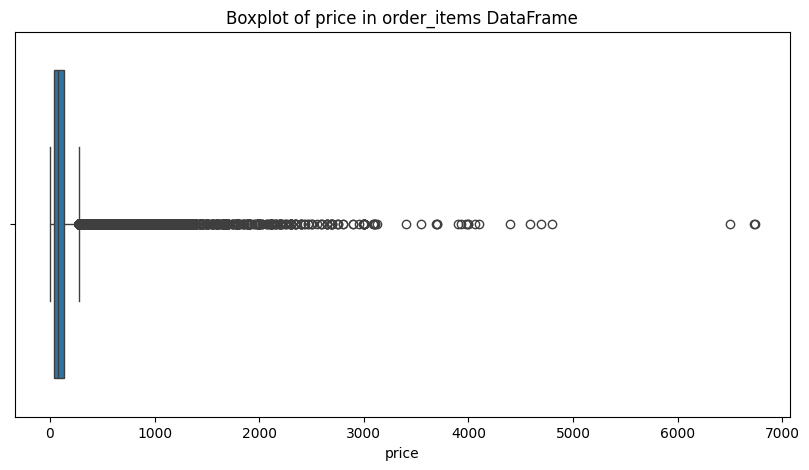

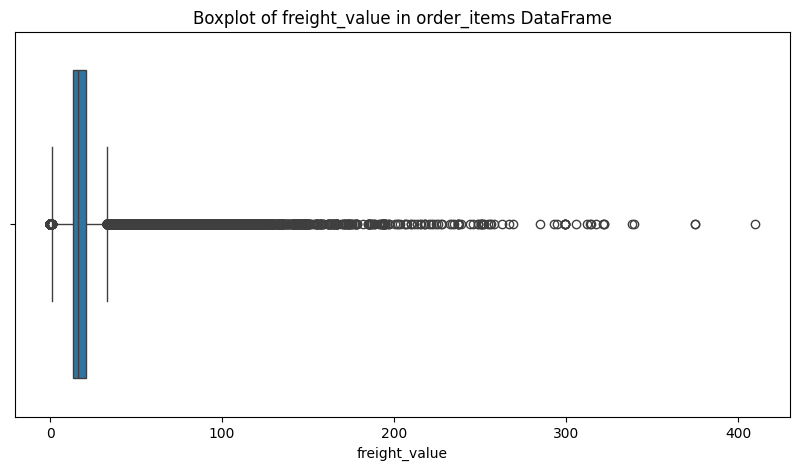

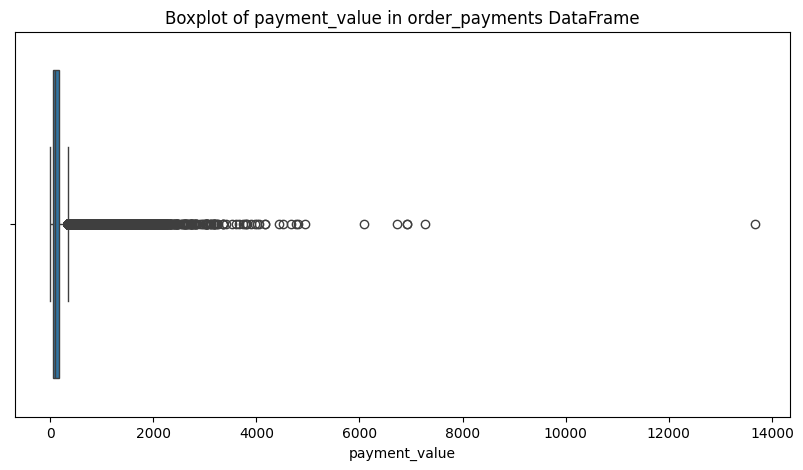

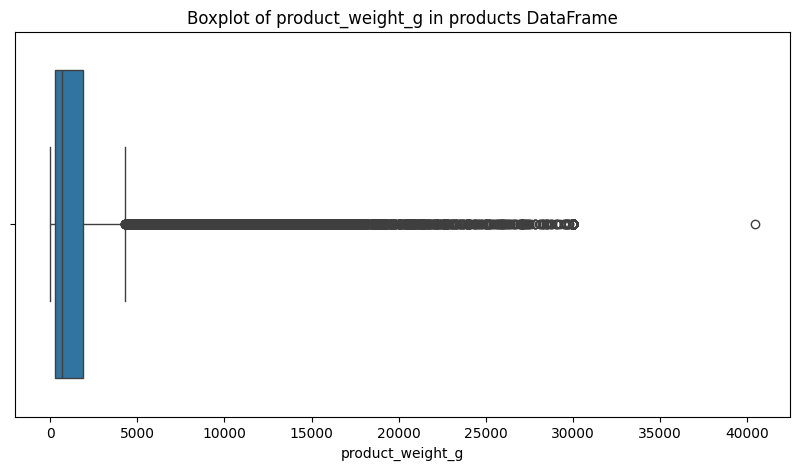

In [110]:
columns_to_analyze = {
    'order_items': ['price', 'freight_value'],
    'order_payments': ['payment_value'],
    'products': ['product_weight_g']
}

for name, columns in columns_to_analyze.items():
    df = dataframes[name]
    for column in columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column} in {name} DataFrame")
        plt.show()


##### Insight
Pada Boxplot pertama dan kedua, terlihat bahwa distribusi price dan freight_value pada order_items sangat miring ke kanan, dengan banyak pencilan di ujung atas. Sebagian besar nilai price berada di bawah 1000, sementara sebagian besar freight_value di bawah 50, dengan beberapa nilai mencapai hingga 7000 dan 400, masing-masing.

Pencilan-pencilan ini menunjukkan bahwa ada item atau pengiriman dengan harga atau ongkos kirim yang jauh lebih tinggi daripada rata-rata, sehingga perlu dianalisis lebih lanjut untuk memastikan apakah data ini valid atau merupakan anomali.

Pada payment_value, Sebagian besar nilai pembayaran terkonsentrasi di bawah 2.000. Hal ini mengindikasikan bahwa mayoritas transaksi memiliki nilai yang relatif rendah. Ada beberapa outlier dengan nilai pembayaran yang jauh lebih tinggi, mencapai sekitar 14.000. Ini menunjukkan adanya transaksi dengan nilai yang sangat tidak biasa dibandingkan dengan mayoritas data. Rentang antar kuartil (IQR) cukup sempit, yang menunjukkan bahwa sebagian besar nilai pembayaran berada dalam rentang yang tidak terlalu luas.

Pada product_weight_g, Sebagian besar berat produk terkonsentrasi di bawah 5.000 gram. Ini menunjukkan bahwa mayoritas produk yang dijual memiliki berat yang relatif ringan. Ada beberapa outlier dengan berat produk yang jauh lebih tinggi, mencapai sekitar 40.000 gram. Ini mengindikasikan adanya produk dengan berat yang sangat tidak biasa dibandingkan dengan mayoritas data. Rentang antar kuartil (IQR) juga cukup sempit, yang menunjukkan bahwa sebagian besar berat produk berada dalam rentang yang tidak terlalu luas.







#### Answer the Question

1. 5 Barang terbanyak apakah yang dibeli di semua state dalam rentang musim hujan dan kemarau?

pengolahan data dengan menggabungkan beberapa DataFrame untuk menganalisis pembelian produk berdasarkan lokasi pelanggan dan musim. Proses dimulai dengan menggabungkan data pesanan (orders_df) dengan data pelanggan (customers_df) untuk mendapatkan informasi lokasi pelanggan. Kemudian, data pesanan digabungkan dengan item pesanan (order_items_df) untuk mendapatkan informasi produk, diikuti dengan penggabungan data produk (products_df) untuk menambahkan kategori produk, dan terakhir dengan terjemahan kategori produk (product_category_translation_df) untuk mendapatkan nama kategori dalam bahasa Inggris. Setelah itu, kode menambahkan kolom bulan dari tanggal pembelian dan mengklasifikasikan bulan ke dalam musim basah atau kering. Data kemudian dikelompokkan berdasarkan negara pelanggan, musim, dan kategori produk untuk menghitung jumlah pembelian, dan akhirnya, kode ini mengambil lima produk teratas yang paling banyak dibeli untuk setiap negara pelanggan dan musim.

In [94]:
# 1. Gabungkan orders dengan customers untuk mendapatkan customer_state
df_merged = pd.merge(orders_df, customers_df, on='customer_id')

# 2. Gabungkan dengan order_items untuk mendapatkan informasi produk
df_merged = pd.merge(df_merged, order_items_df, on='order_id')

# 3. Gabungkan dengan products untuk mendapatkan kategori produk
df_merged = pd.merge(df_merged, products_df[['product_id', 'product_category_name']], on='product_id')

# 4. Gabungkan dengan product_category_translation untuk mendapatkan nama kategori dalam bahasa Inggris
df_merged = pd.merge(df_merged, product_category_translation_df[['product_category_name', 'product_category_name_english']], on='product_category_name')

# 5. Tambahkan kolom untuk motnh
df_merged['order_purchase_timestamp'] = pd.to_datetime(df_merged['order_purchase_timestamp'])
df_merged['month'] = df_merged['order_purchase_timestamp'].dt.month

def classify_season(month):
    if month in [12, 1, 2, 3, 4]:  # Musim Basah
        return 'Wet Season'
    else:  # Musim Kering
        return 'Dry Season'

df_merged['season'] = df_merged['month'].apply(classify_season)

# 6. Kelompokkan data berdasarkan customer_state, season, dan product_category_name_english
grouped = df_merged.groupby(['customer_state', 'season', 'product_category_name_english']).size().reset_index(name='purchase_count')

# 7. Ambil 5 produk teratas untuk setiap customer_state dan musim
top5_purchased_products = grouped.groupby(['customer_state', 'season']).apply(lambda x: x.nlargest(5, 'purchase_count')).reset_index(drop=True)


C:\Users\p\AppData\Local\Temp\ipykernel_21536\1983233766.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_purchased_products = grouped.groupby(['customer_state', 'season']).apply(lambda x: x.nlargest(5, 'purchase_count')).reset_index(drop=True)


2. 5 Barang terbanyak apakah yang terjual dari semua state dalam rentang musim hujan dan kemarau?

menggabungkan dan memproses data penjualan produk dari beberapa DataFrame dengan: pertama, menggabungkan DataFrame orders, order_items, products, sellers, dan customers untuk mengumpulkan informasi lengkap mengenai pesanan; kedua, memilih kolom-kolom relevan yang diperlukan untuk analisis; ketiga, menambahkan nama kategori produk dalam bahasa Inggris dengan menggabungkan dengan product_category_translation_df dan mengganti kolom yang sesuai; keempat, mengonversi kolom waktu menjadi tipe datetime; kelima, menambahkan kolom untuk menentukan musim berdasarkan waktu pembelian; dan terakhir, menghitung jumlah produk berdasarkan negara bagian dan musim serta mengambil lima produk teratas untuk masing-masing kombinasi tersebut.

In [95]:
# 1. Gabungkan DataFrame orders_df, order_items_df, products_df, sellers_df, customers_df
merged_df = orders_df.merge(order_items_df, on='order_id') \
    .merge(products_df, on='product_id') \
    .merge(sellers_df, on='seller_id') \
    .merge(customers_df, on='customer_id')

# 2. Pilih kolom yang relevan
merged_df = merged_df[['product_id', 'product_category_name', 'order_status',
                       'order_purchase_timestamp', 'seller_state']]

# 3. Gabungkan dengan product_category_translation_df untuk mendapatkan nama kategori dalam bahasa Inggris
merged_df = merged_df.merge(product_category_translation_df[['product_category_name', 'product_category_name_english']], on='product_category_name', how='left')

# 4. Ganti kolom 'product_category_name' dengan nama dalam bahasa Inggris
merged_df['product_category_name'] = merged_df['product_category_name_english']

# 5. Hapus kolom 'product_category_name_english' karena tidak diperlukan lagi
merged_df.drop('product_category_name_english', axis=1, inplace=True)

# 6. Ubah kolom waktu menjadi tipe datetime
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

# 7. Fungsi untuk menentukan musim
def get_season(date):
    if date.month in [12, 1, 2, 3, 4]:
        return 'wet'
    else:
        return 'dry'

# 8. Tambahkan kolom musim
merged_df['season'] = merged_df['order_purchase_timestamp'].apply(get_season)

# 9. Hitung jumlah produk per negara bagian dan musim
product_counts = merged_df.groupby(['seller_state', 'season', 'product_category_name']) \
    .size().reset_index(name='count')

# 10. Ambil 5 produk teratas untuk setiap negara bagian dan musim
top5_produced_products = product_counts.groupby(['seller_state', 'season']) \
    .apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


C:\Users\p\AppData\Local\Temp\ipykernel_21536\1679204581.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


3. Berapa pengeluaran seluruh state pada musim hujan dan kemarau?

pengolahan data untuk menganalisis pengeluaran total berdasarkan musim dan negara bagian. Pertama, DataFrame orders_df digabungkan dengan order_payments_df untuk mengaitkan informasi pesanan dengan detail pembayaran, lalu ditambahkan dengan customers_df untuk menyertakan informasi pelanggan. Selanjutnya, kolom waktu konversi diubah menjadi tipe datetime. Kode ini kemudian membedakan data berdasarkan musim hujan (bulan Desember hingga April) dan musim kemarau (bulan Mei hingga November). Total pengeluaran dihitung untuk masing-masing negara bagian dengan menggunakan fungsi groupby pada kedua musim, dan kolom hasil pengeluaran diubah namanya menjadi lebih jelas sebagai total_expenditure.


In [96]:
# Menggabungkan DataFrame
merged_df = pd.merge(orders_df, order_payments_df, on='order_id')
total_spending = pd.merge(merged_df, customers_df, on='customer_id')

# Konversi kolom waktu menjadi datetime
total_spending['order_purchase_timestamp'] = pd.to_datetime(total_spending['order_purchase_timestamp'])

# Menentukan musim hujan dan kemarau
wet_season = total_spending[(total_spending['order_purchase_timestamp'].dt.month >= 12) | (total_spending['order_purchase_timestamp'].dt.month <= 4)]
dry_season = total_spending[(total_spending['order_purchase_timestamp'].dt.month >= 5) & (total_spending['order_purchase_timestamp'].dt.month <= 11)]

# Menghitung total pengeluaran per state
total_wet = wet_season.groupby('customer_state')['payment_value'].sum().reset_index()
total_dry = dry_season.groupby('customer_state')['payment_value'].sum().reset_index()

# Mengubah nama kolom untuk kejelasan
total_wet.rename(columns={'payment_value': 'total_expenditure'}, inplace=True)
total_dry.rename(columns={'payment_value': 'total_expenditure'}, inplace=True)



#### Visualization and Explanatory Analysis

1. 5 Barang terbanyak apakah yang dibeli di semua state dalam rentang musim hujan dan kemarau?

membuat diagram batang untuk membandingkan jumlah pembelian produk antara musim hujan dan musim kemarau di setiap negara bagian. Untuk setiap negara bagian, data dibagi menjadi dua subset: satu untuk musim hujan dan satu untuk musim kemarau. Kemudian, dua set batang diplot bersebelahan, dengan batang untuk musim kemarau (diberi warna oranye) di sebelah kiri dan batang untuk musim hujan (diberi warna biru langit) di sebelah kanan. Sumbu x menunjukkan kategori produk, sementara sumbu y menunjukkan jumlah pembelian. Judul dan label sumbu ditambahkan untuk memberikan konteks, dan kategori produk diatur agar mudah dibaca dengan rotasi.


C:\Users\p\AppData\Local\Temp\ipykernel_21536\1580494174.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


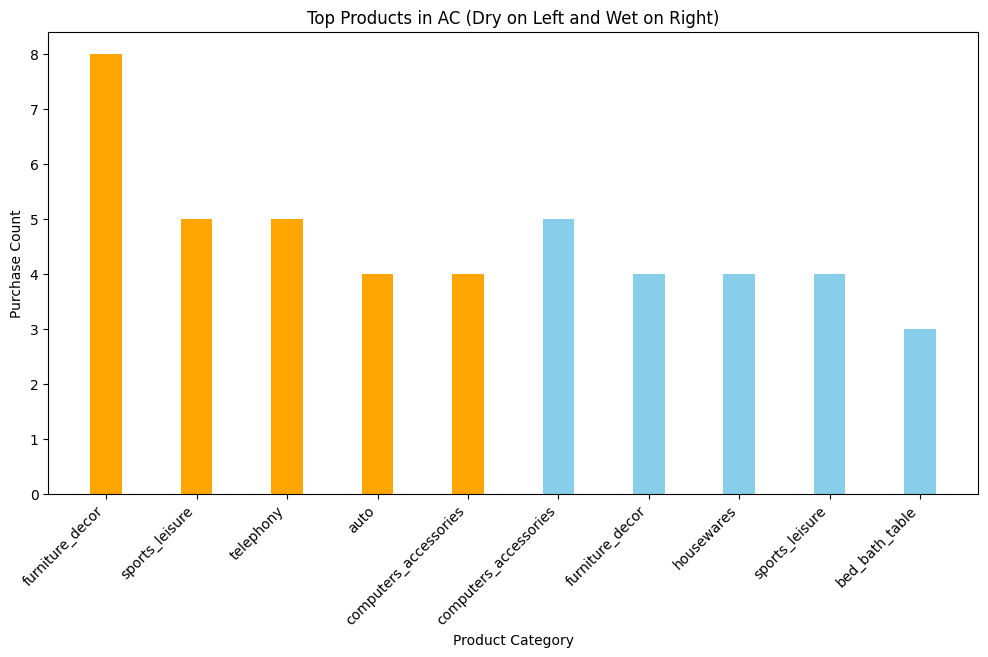

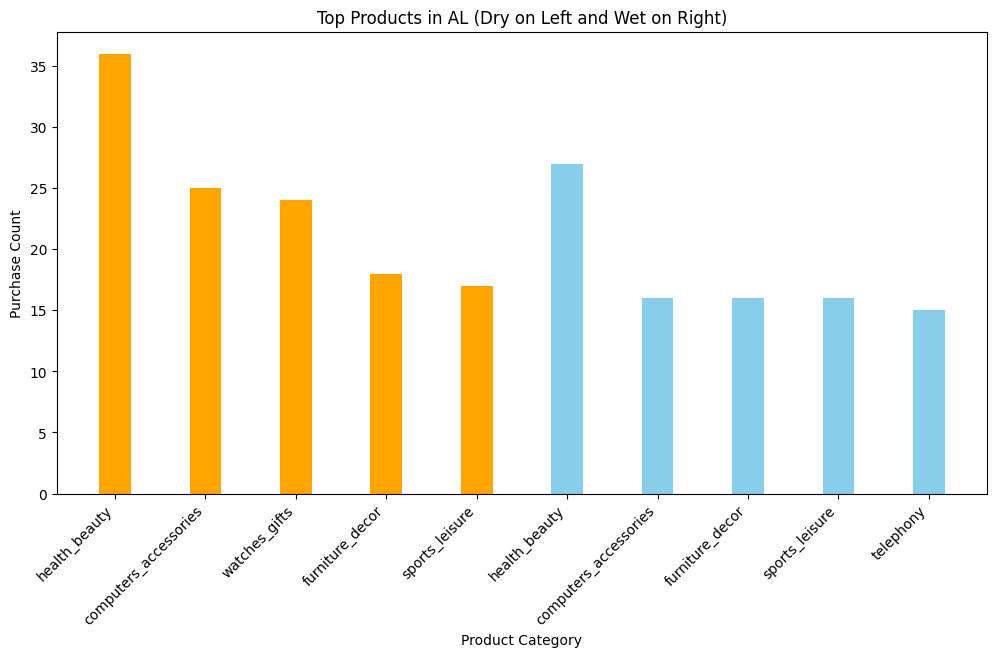

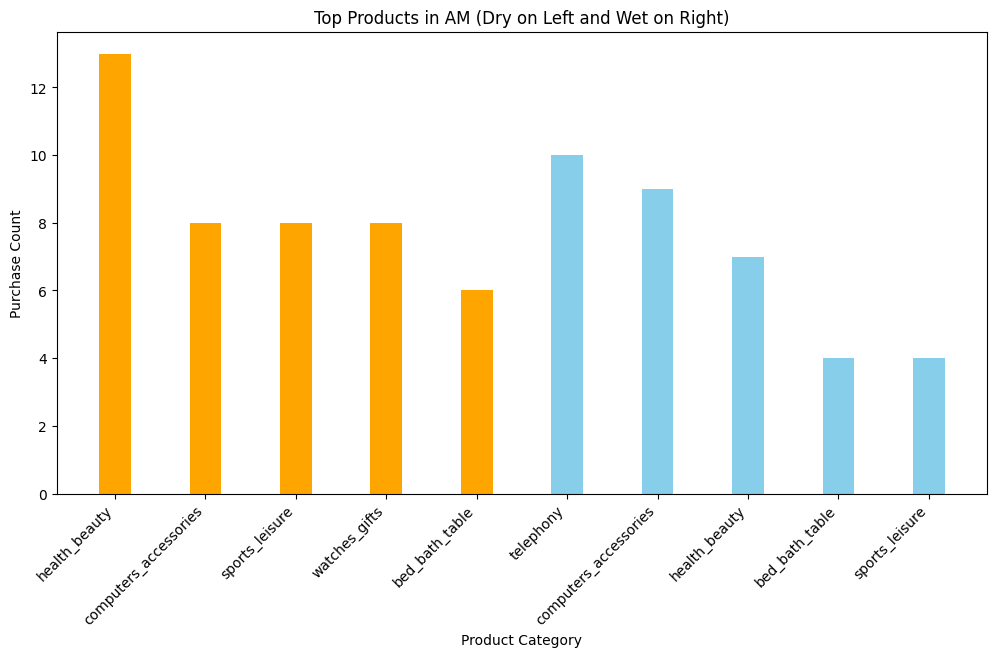

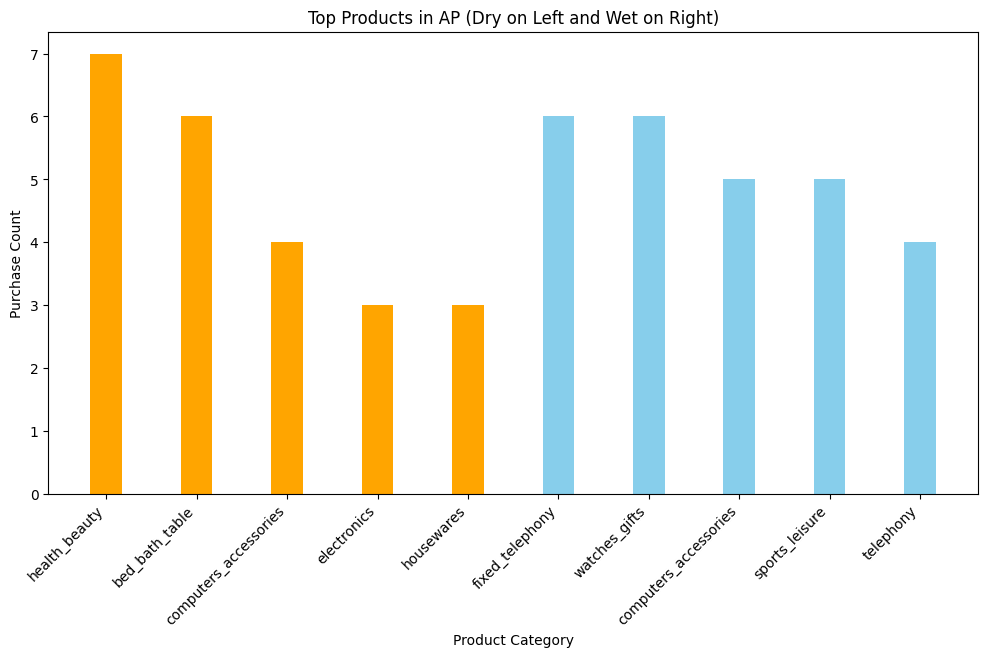

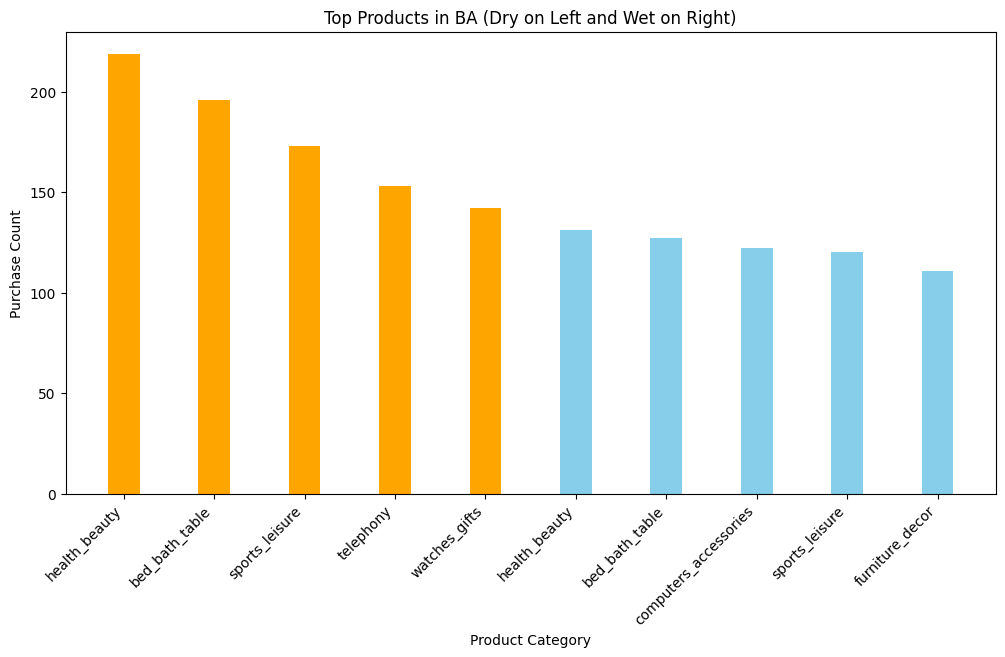

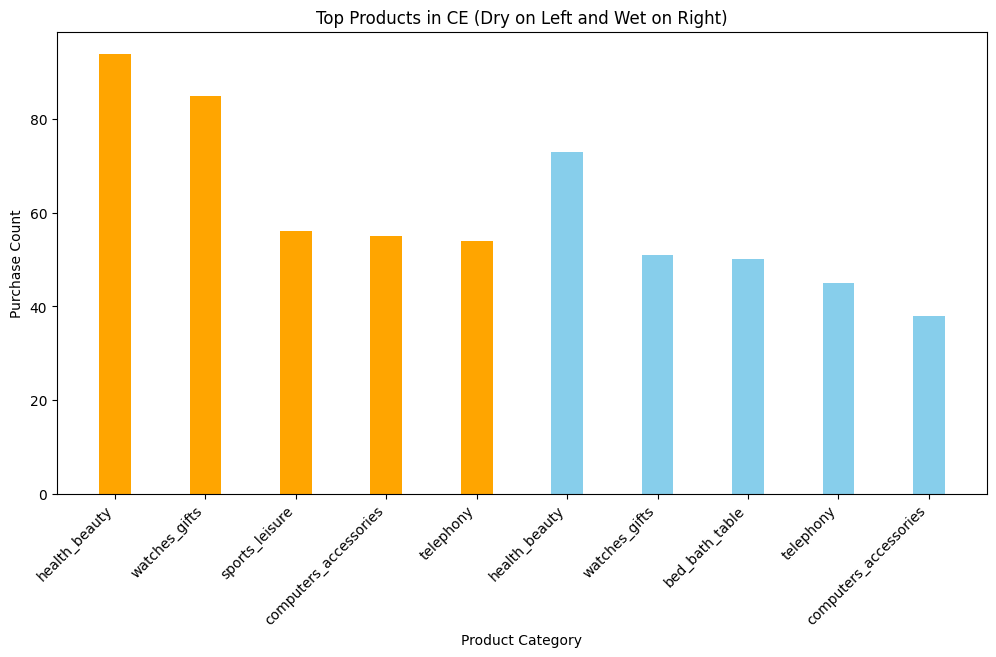

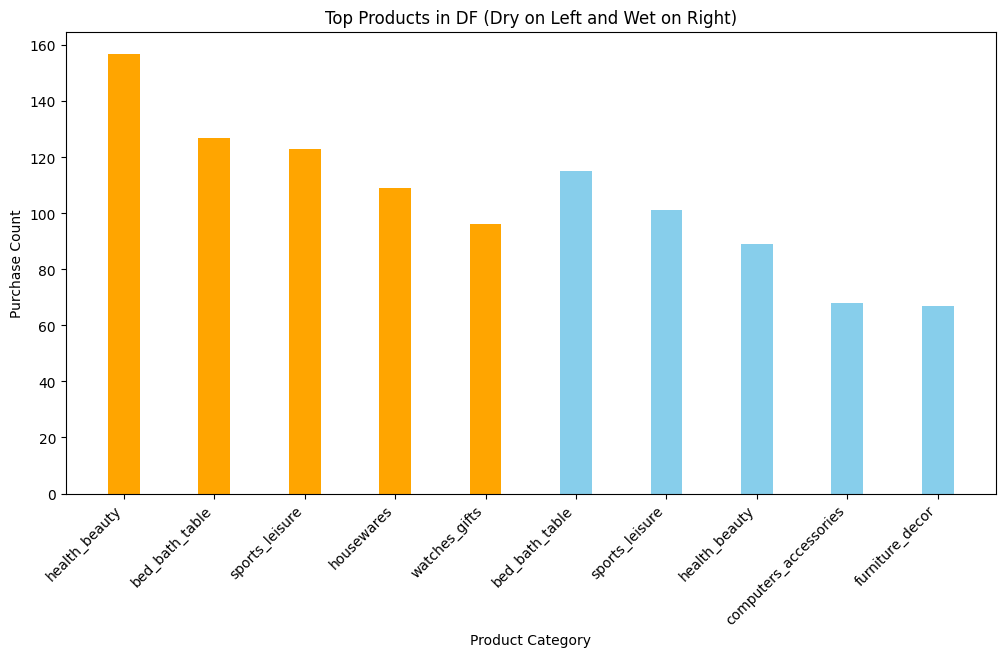

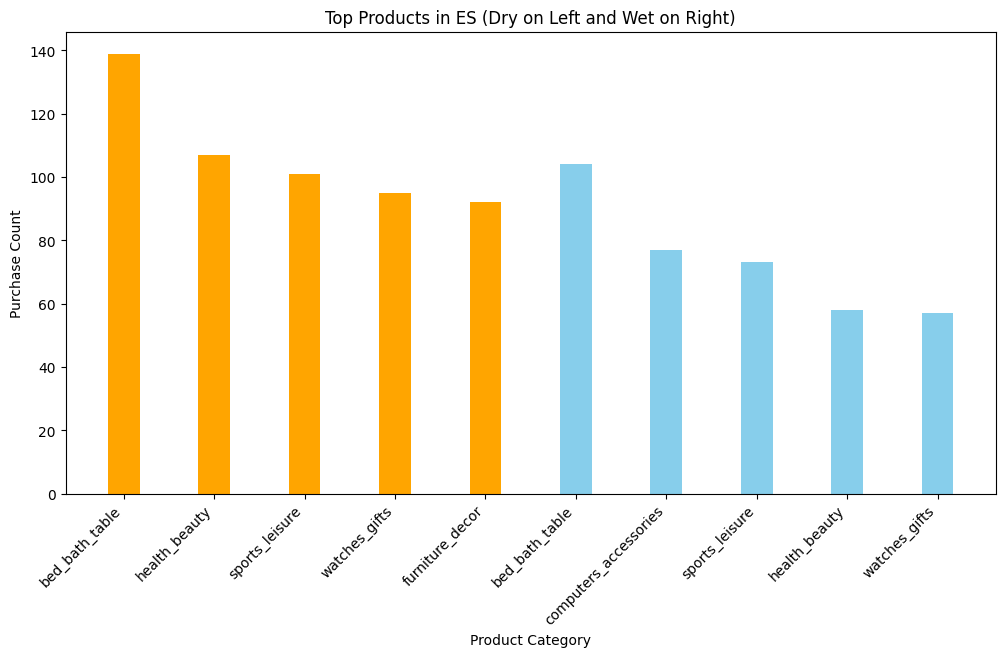

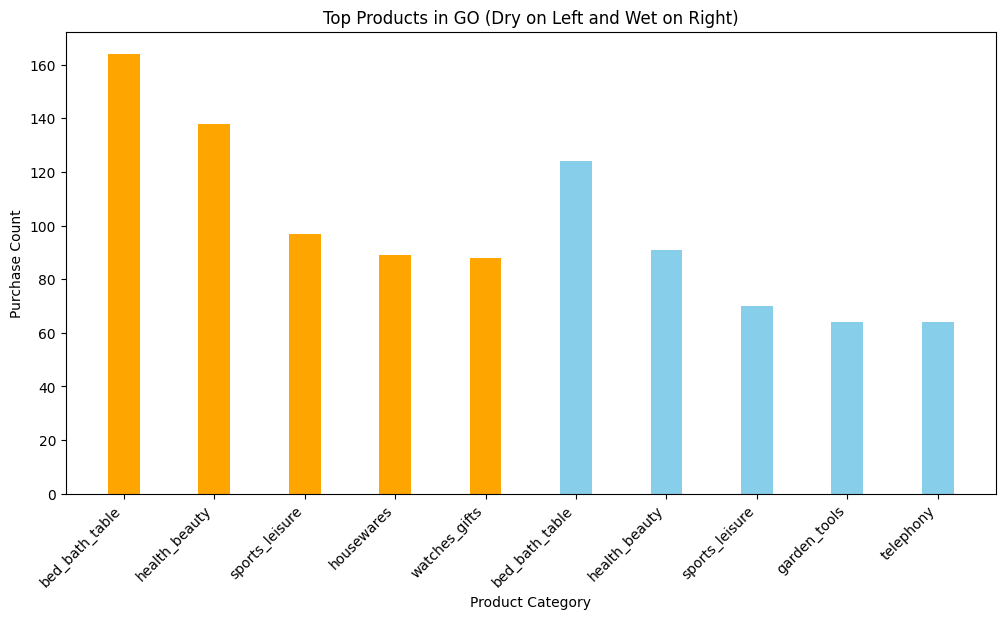

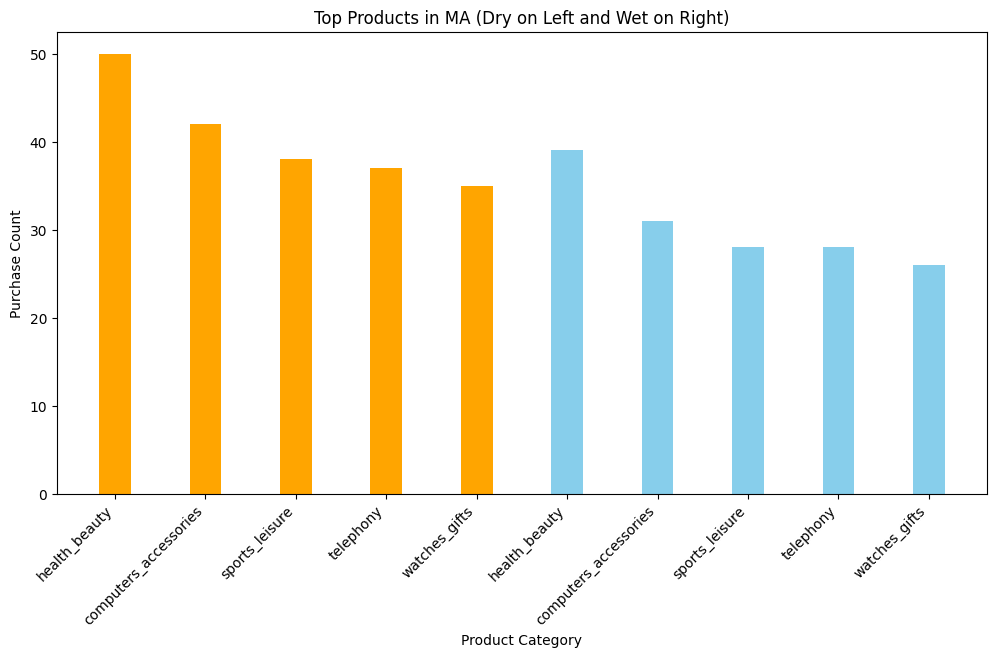

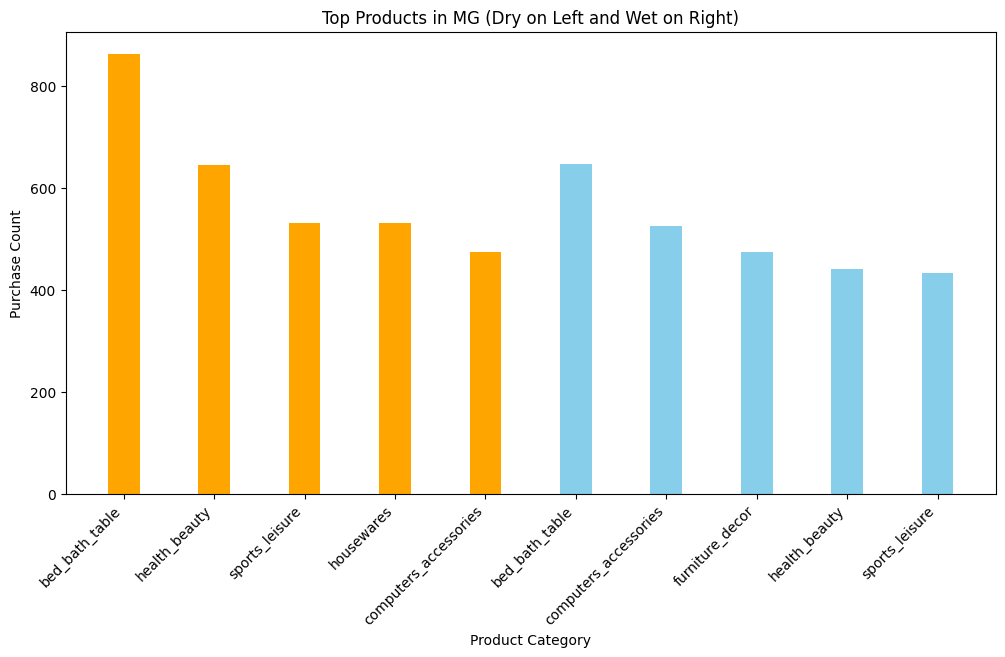

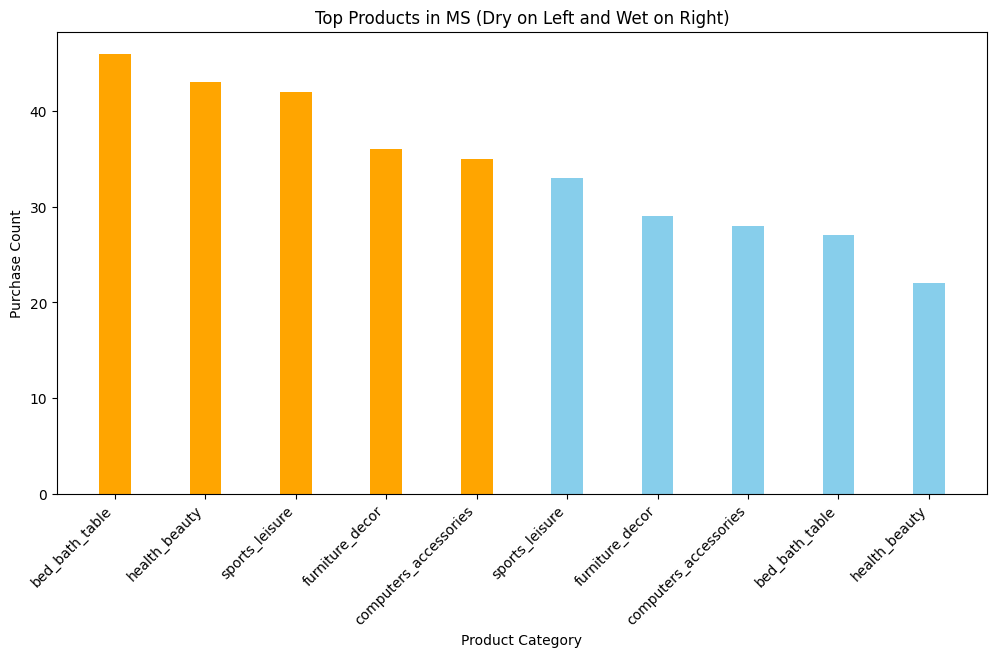

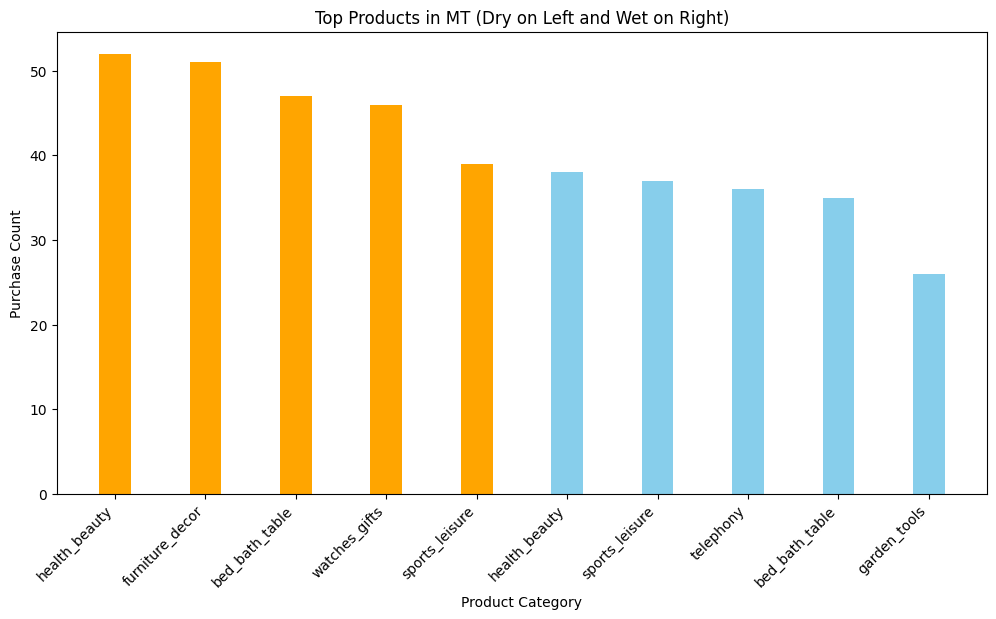

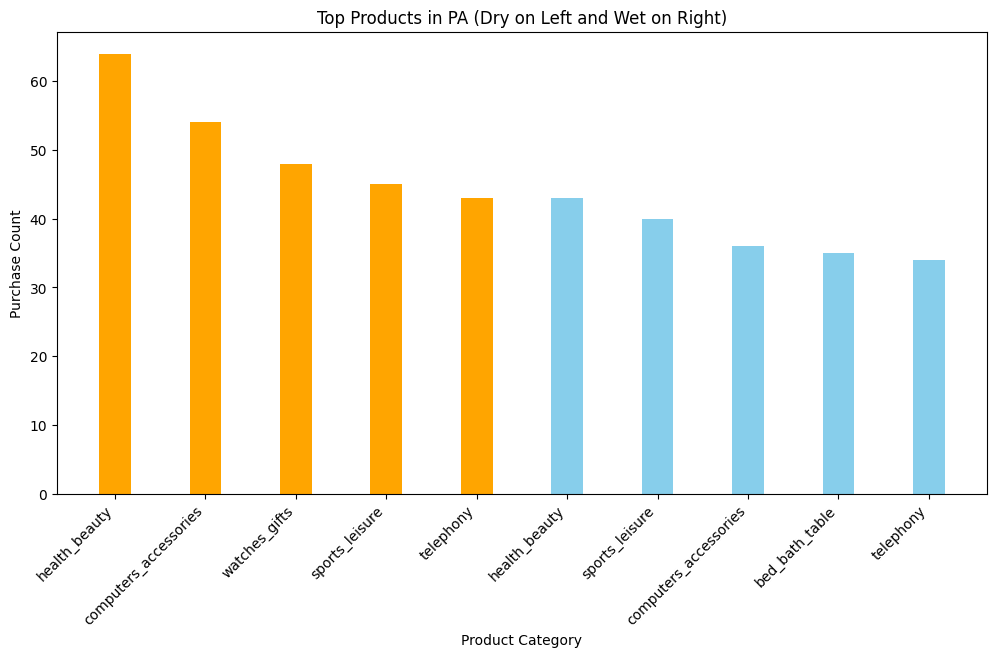

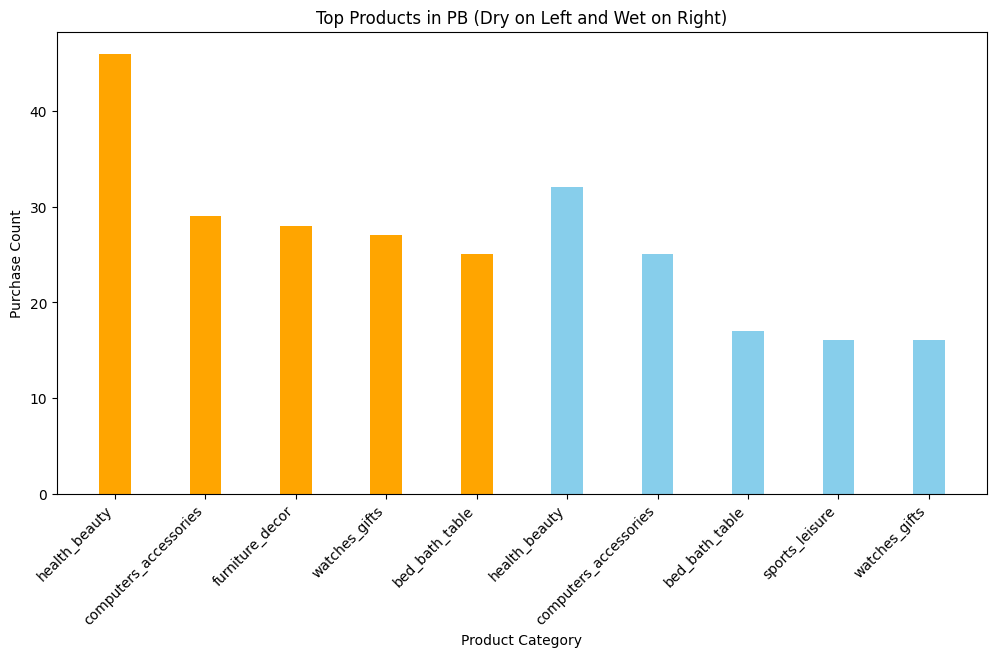

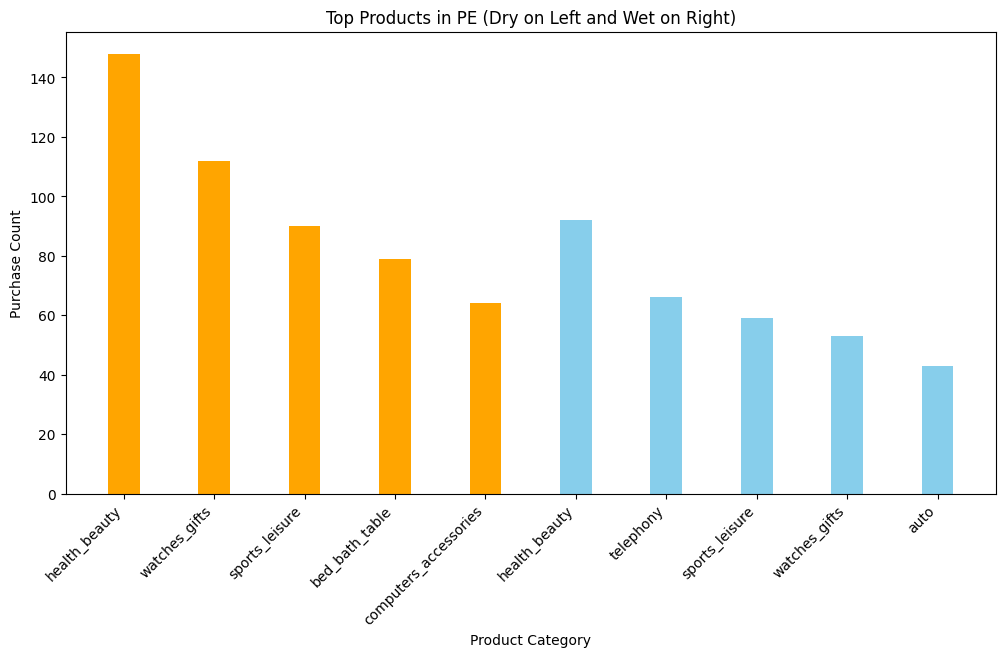

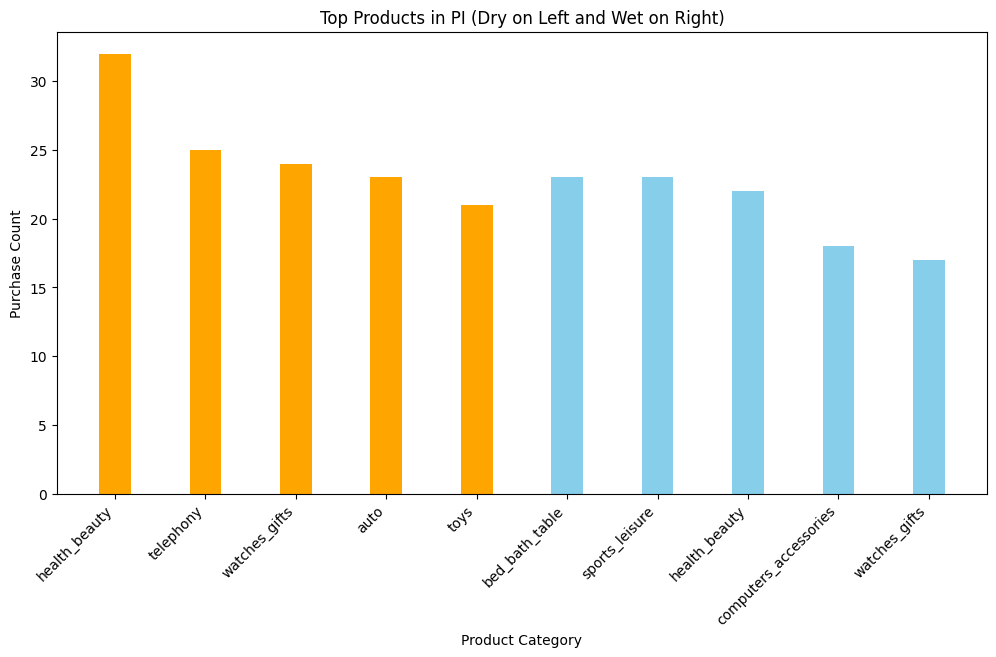

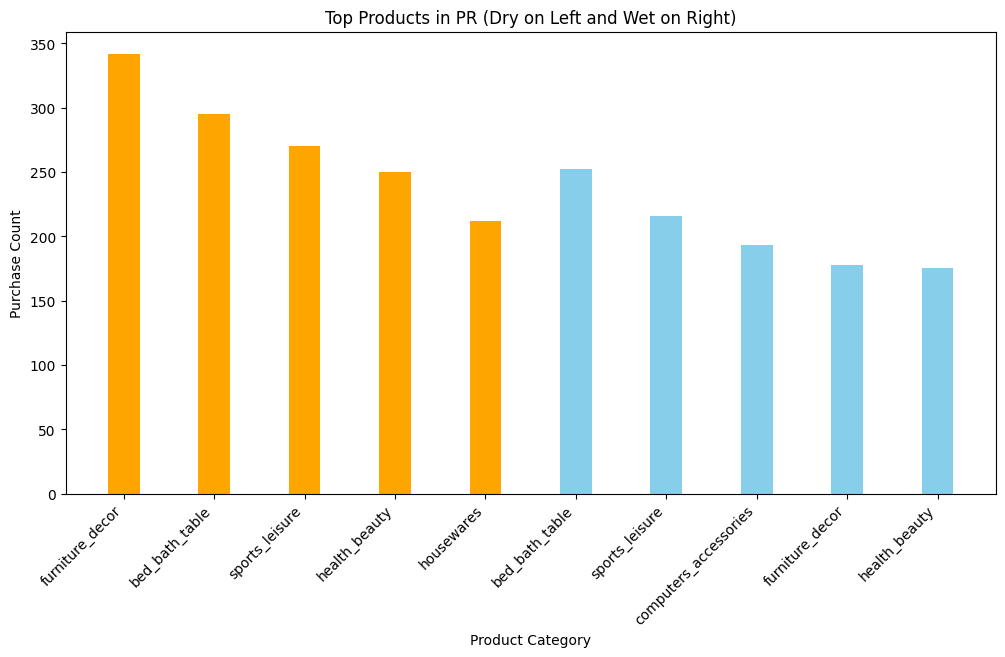

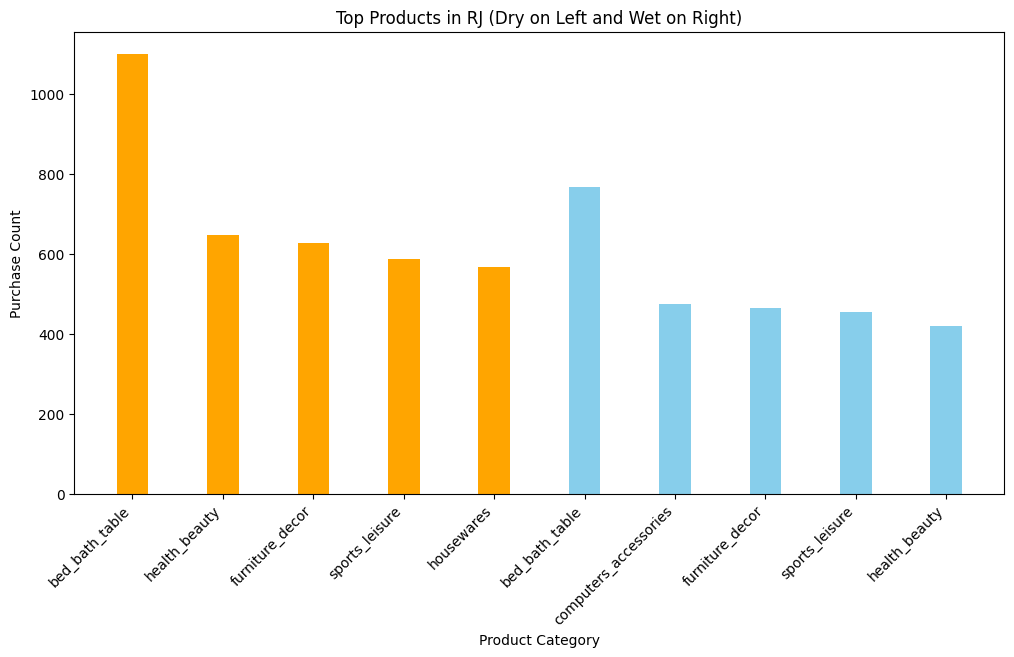

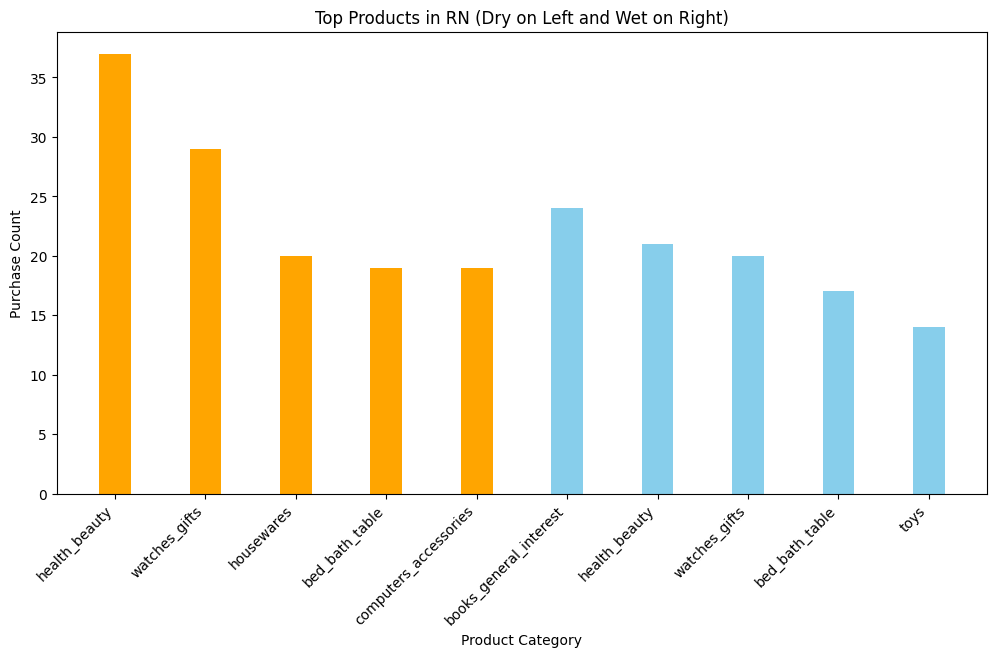

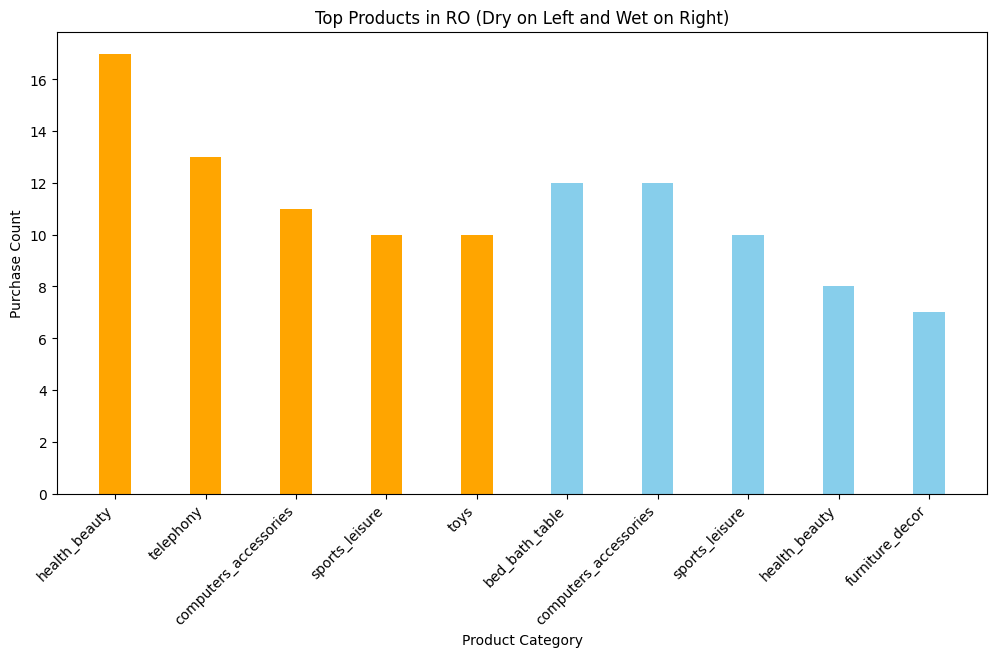

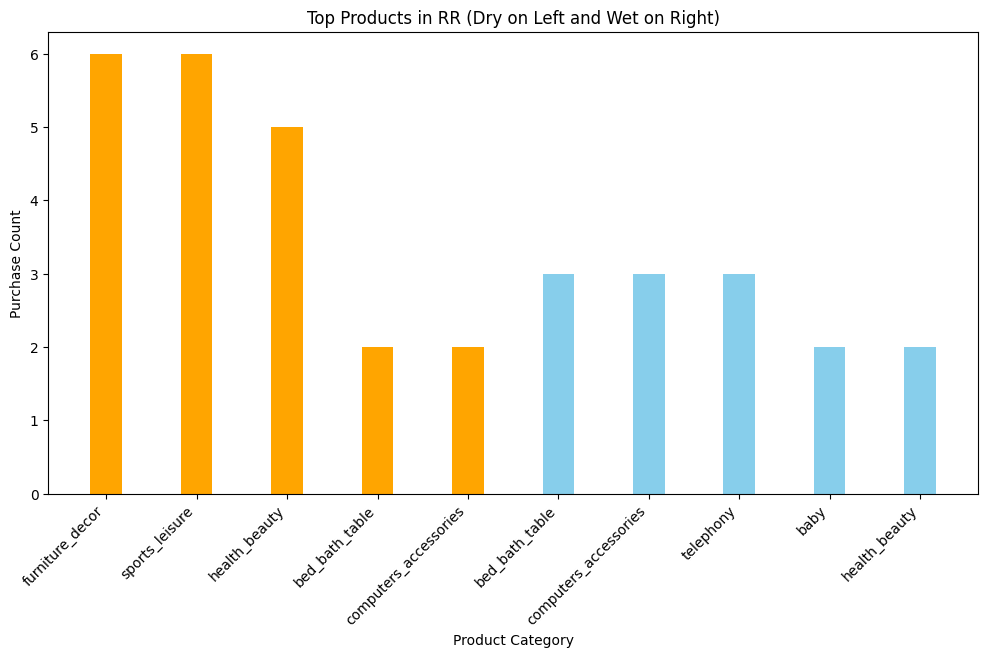

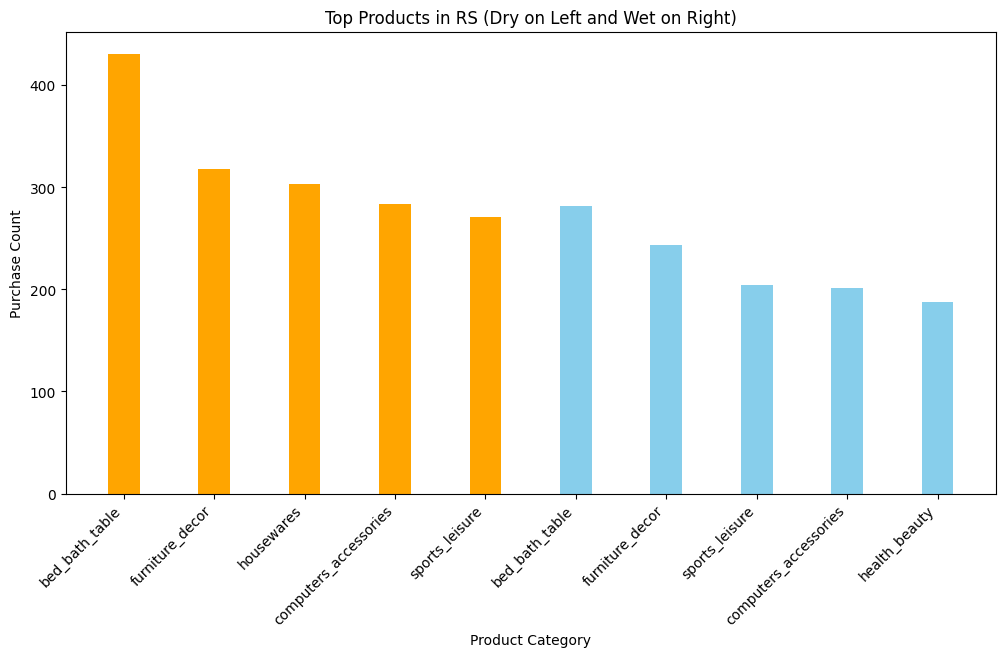

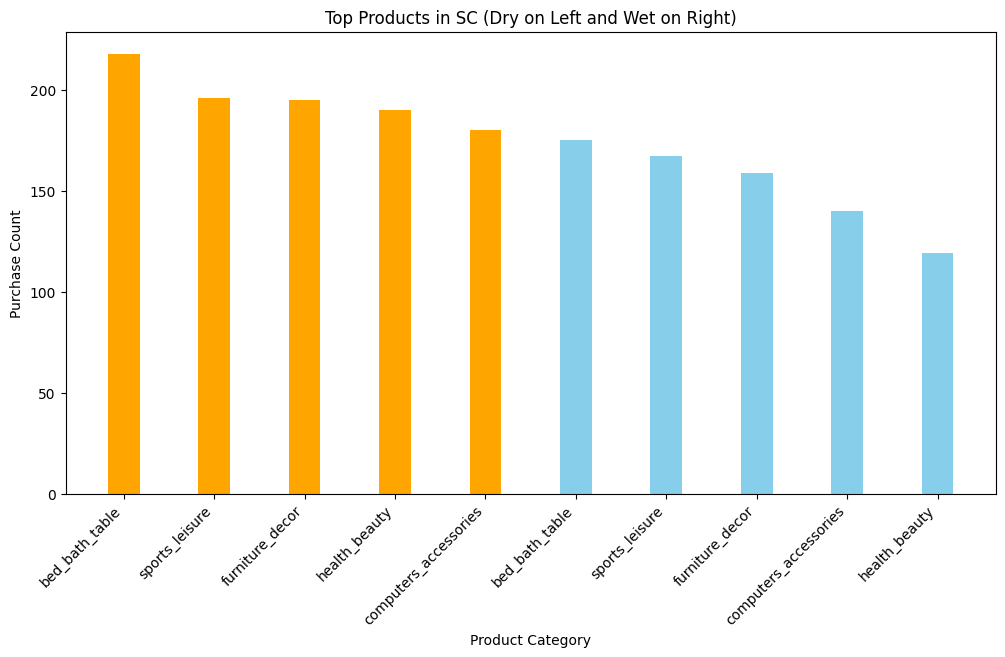

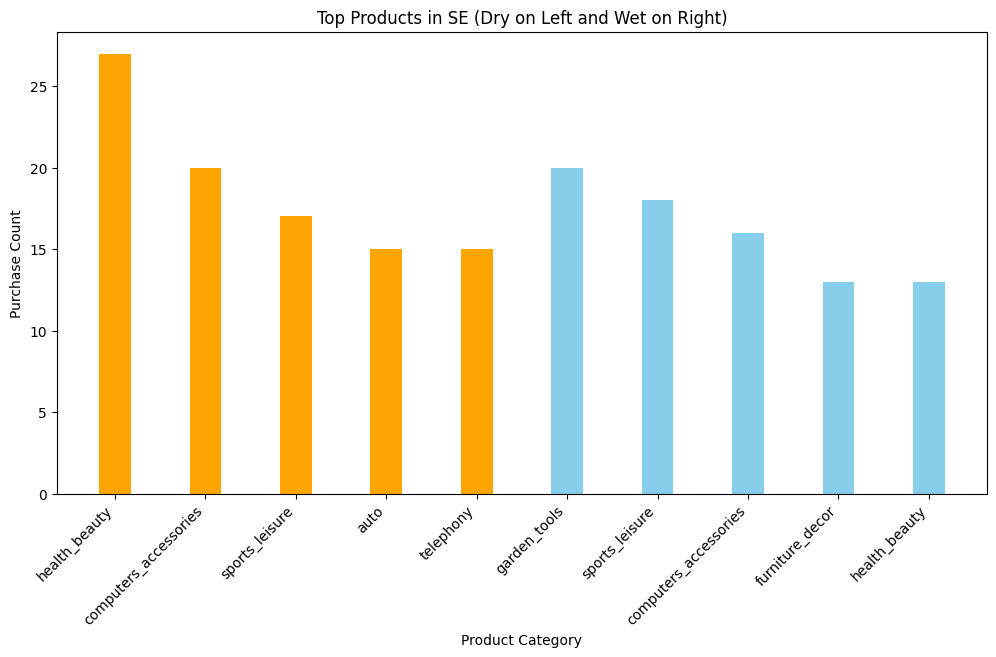

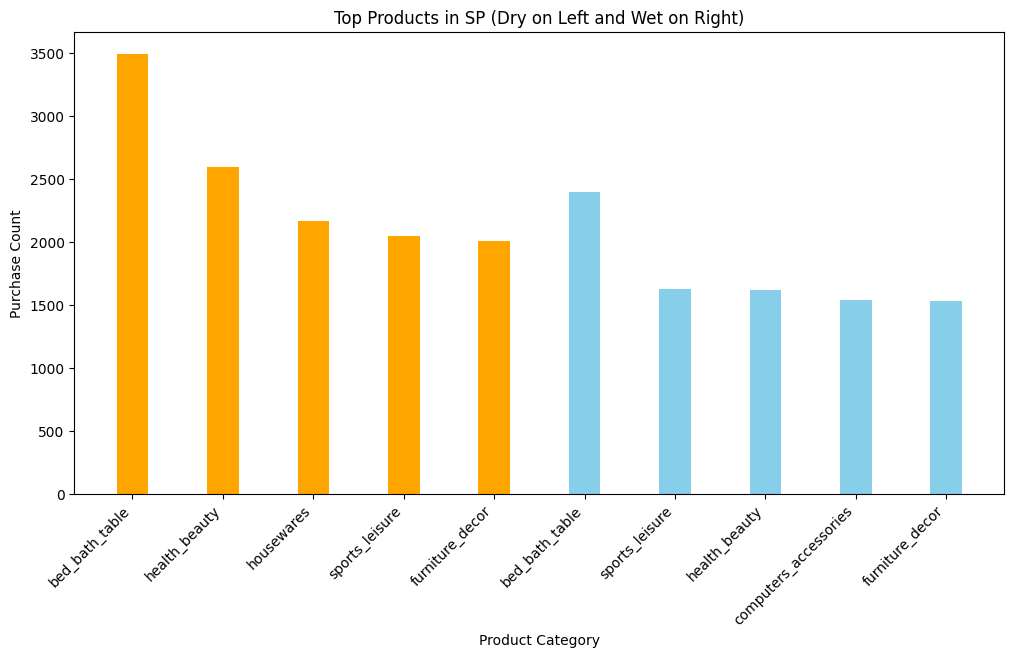

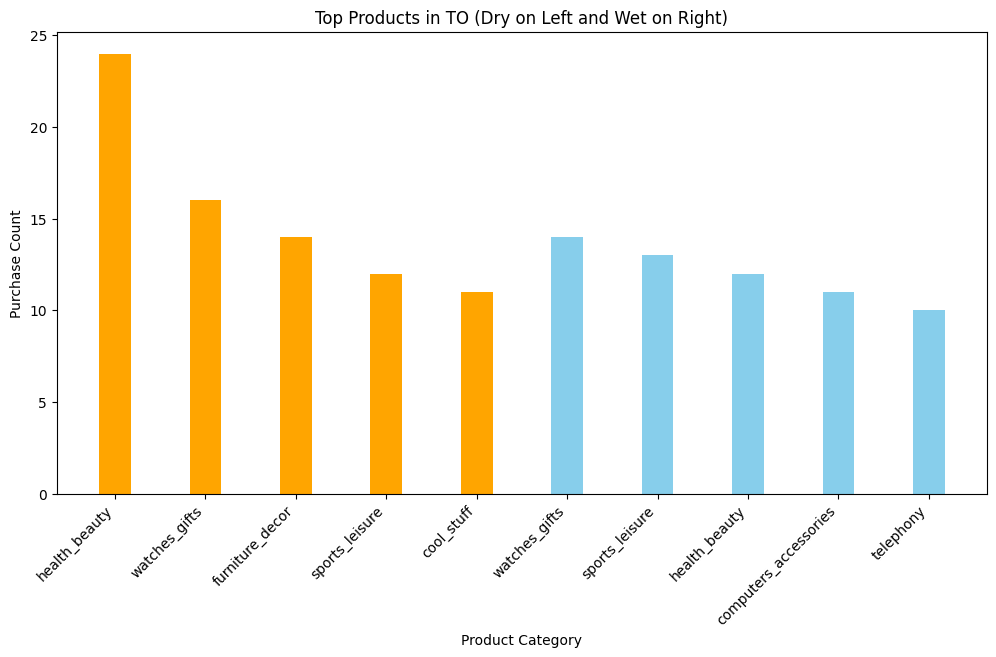

In [97]:

# 8. Visualisasikan gabungan Wet Season dan Dry Season untuk setiap wilayah
for state in top5_purchased_products['customer_state'].unique():
    # Ambil subset untuk masing-masing musim
    subset_wet = top5_purchased_products[(top5_purchased_products['customer_state'] == state) & (top5_purchased_products['season'] == 'Wet Season')]
    subset_dry = top5_purchased_products[(top5_purchased_products['customer_state'] == state) & (top5_purchased_products['season'] == 'Dry Season')]

    # Buat array untuk posisi batang
    bar_width = 0.35
    indices_dry = np.arange(len(subset_dry))  # Posisi untuk dry season
    indices_wet = np.arange(len(subset_wet)) + len(subset_dry)  # Posisi untuk wet season, offset dengan panjang dry season

    # Plot batang
    plt.figure(figsize=(12, 6))
    
    plt.bar(indices_dry, subset_dry['purchase_count'], width=bar_width, label='Dry Season', color='orange', align='center')
    plt.bar(indices_wet, subset_wet['purchase_count'], width=bar_width, label='Wet Season', color='skyblue', align='center')

    # Set label, judul, dan sumbu x
    plt.xlabel('Product Category')
    plt.ylabel('Purchase Count')
    plt.title(f'Top Products in {state} (Dry on Left and Wet on Right)')
    
    # Gabungkan kategori produk untuk kedua musim dan atur ticks
    all_categories = np.concatenate([subset_dry['product_category_name_english'].values, subset_wet['product_category_name_english'].values])
    plt.xticks(np.concatenate([indices_dry, indices_wet]), all_categories, rotation=45, ha='right')

    # Tampilkan legenda
    #plt.legend()

    # Tampilkan grafik
    #plt.tight_layout()
    #plt.show()


2. 5 Barang terbanyak apakah yang terjual dari semua state dalam rentang musim hujan dan kemarau?

Visualisasi diagram batang yang menunjukkan perbandingan jumlah pembelian produk teratas antara musim hujan dan musim kemarau untuk setiap negara bagian. Untuk setiap negara bagian, data dipisahkan menjadi dua subset berdasarkan musim: satu untuk musim kemarau (diberi warna oranye) dan satu untuk musim hujan (diberi warna biru langit). Posisi batang untuk masing-masing musim diatur bersebelahan, dengan sumbu x menampilkan kategori produk dan sumbu y menunjukkan jumlah pembelian. Judul dan label sumbu ditambahkan untuk memberikan konteks yang jelas, sementara legenda membantu membedakan antara musim. 

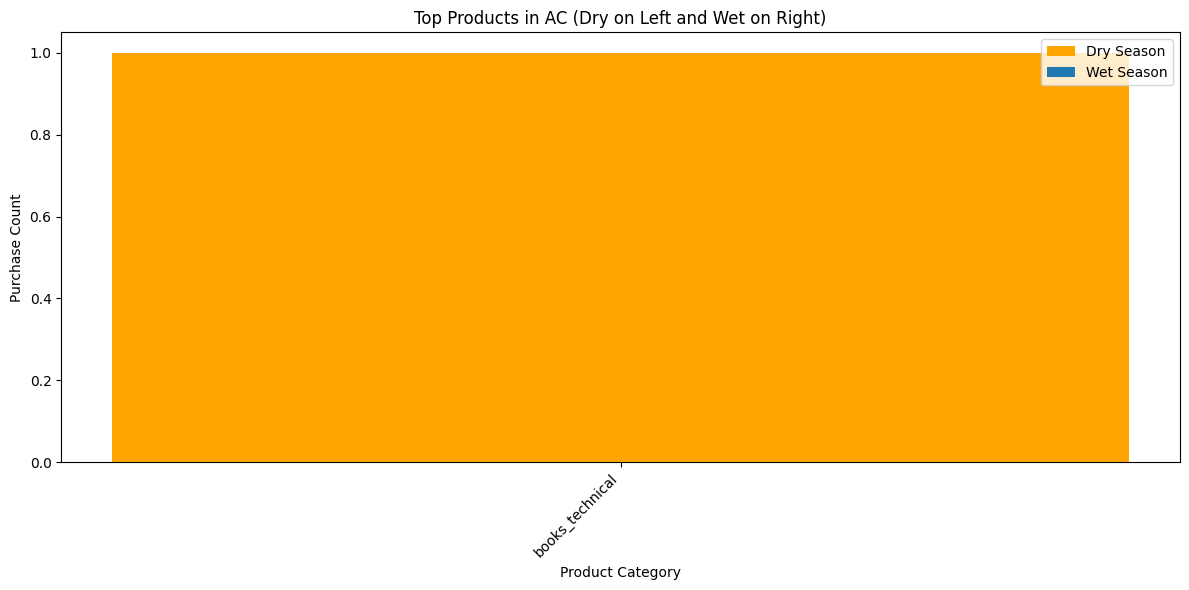

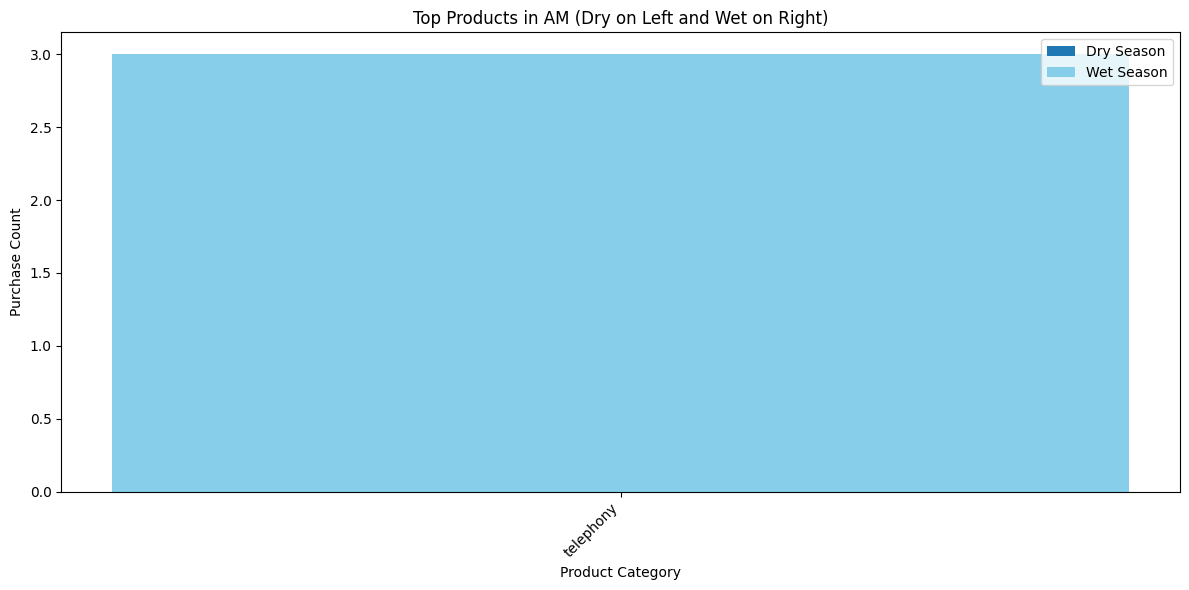

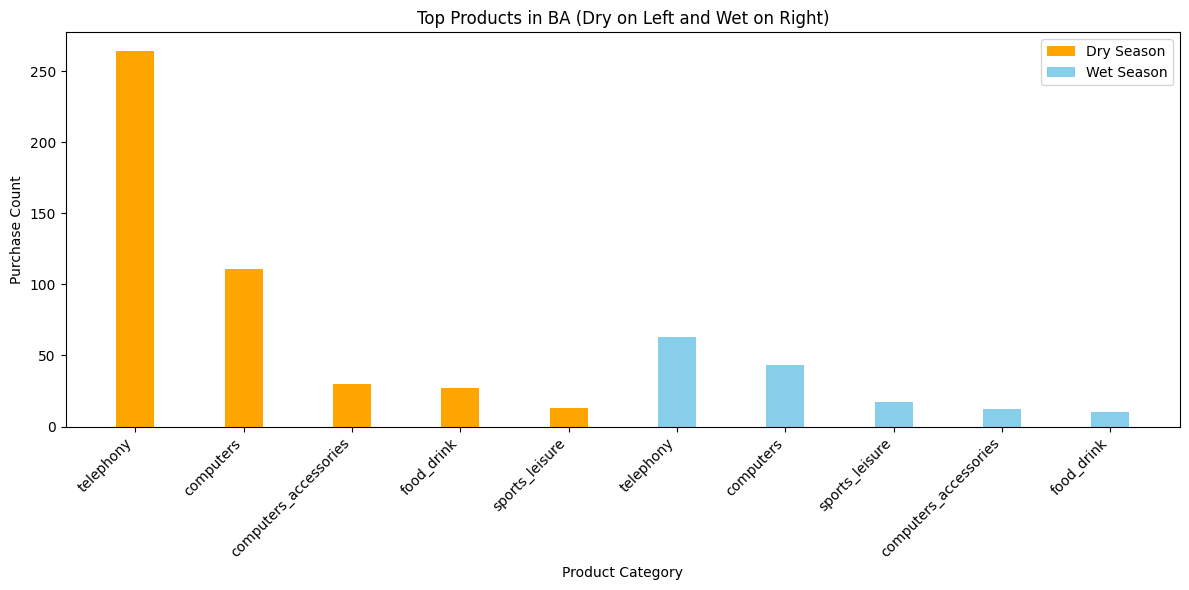

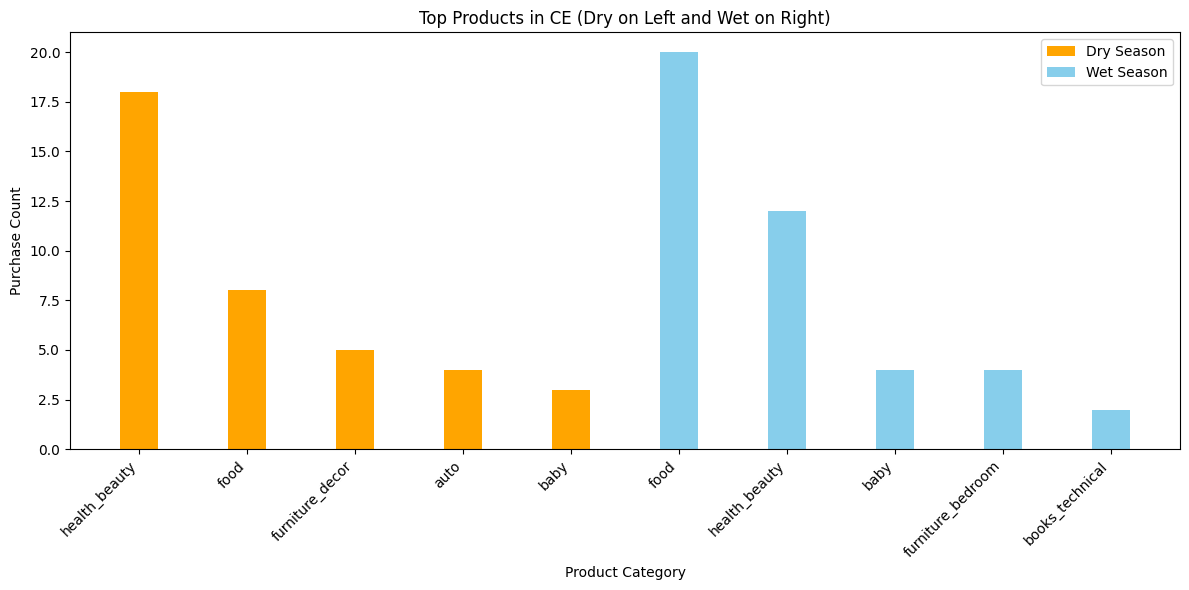

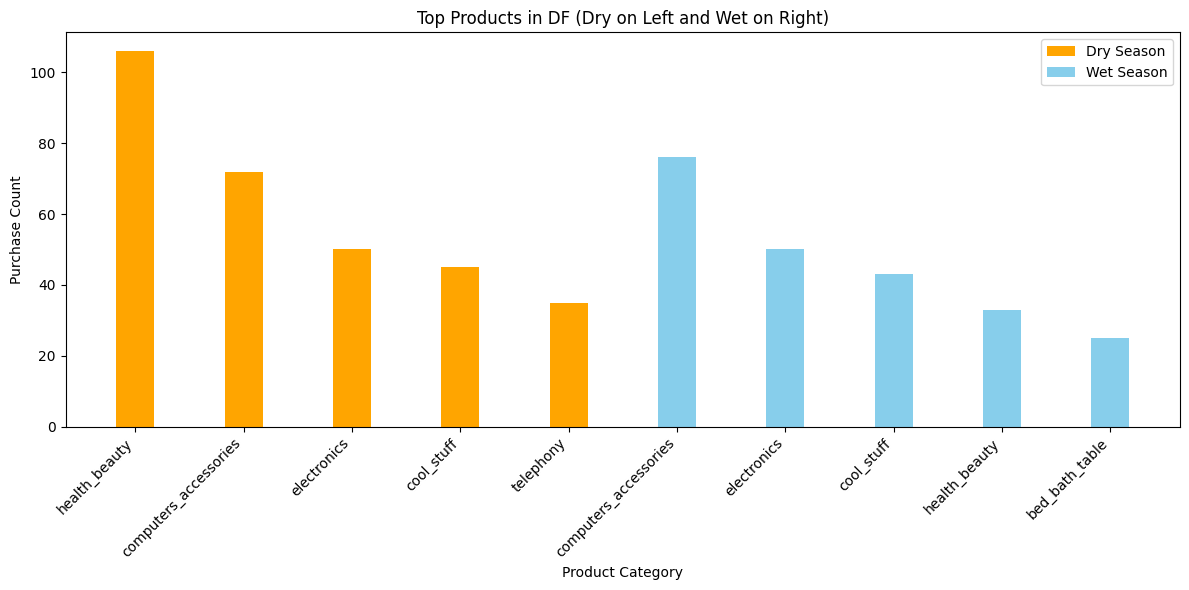

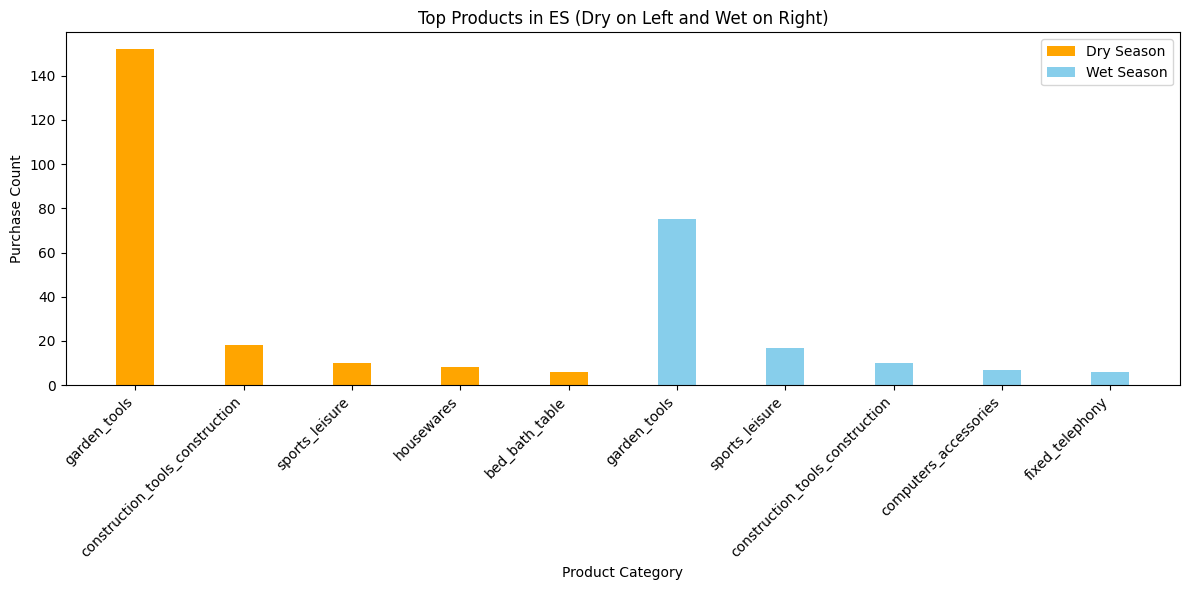

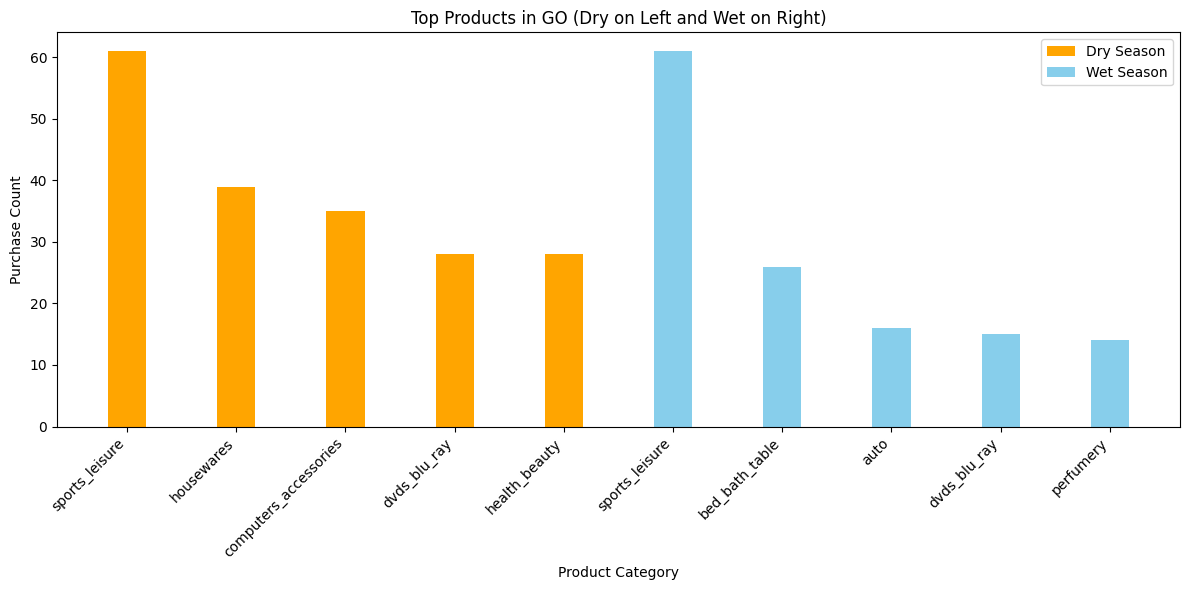

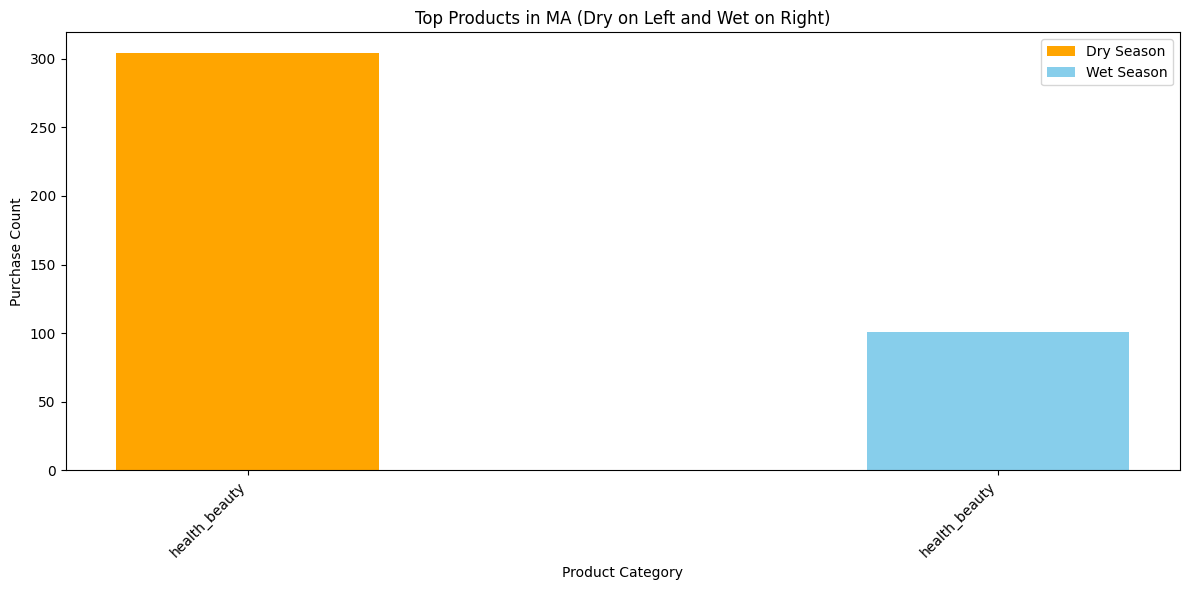

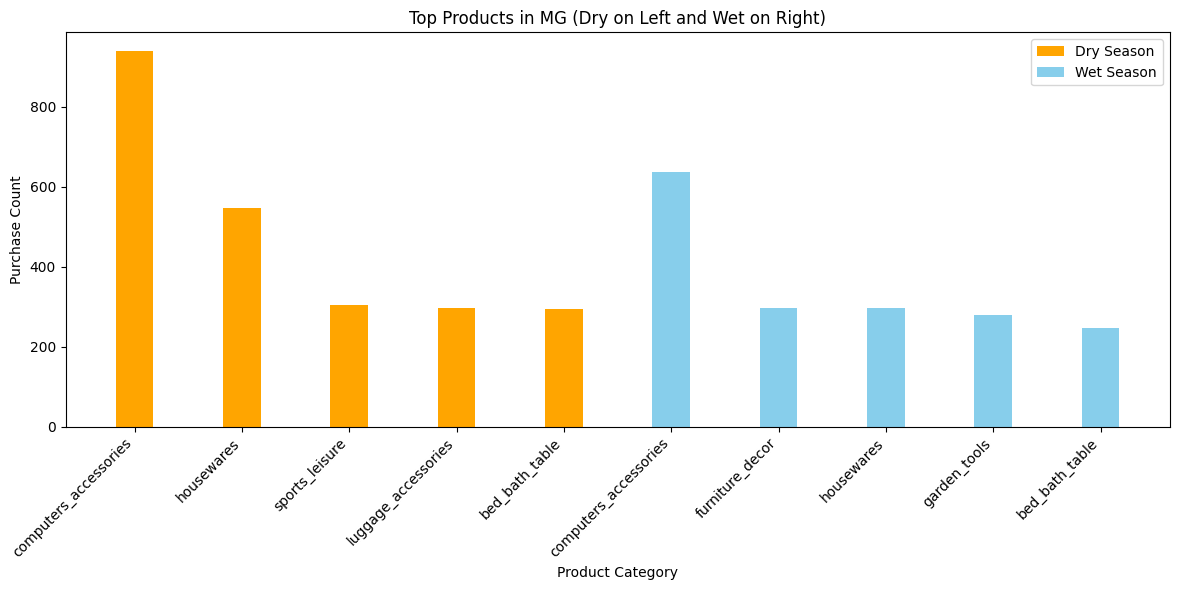

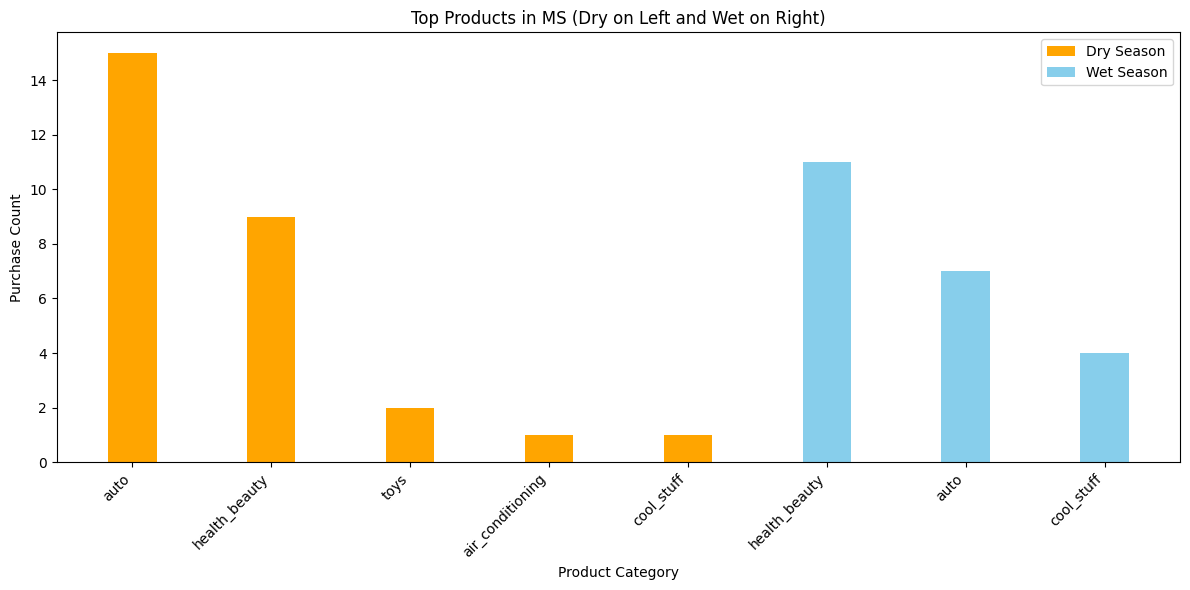

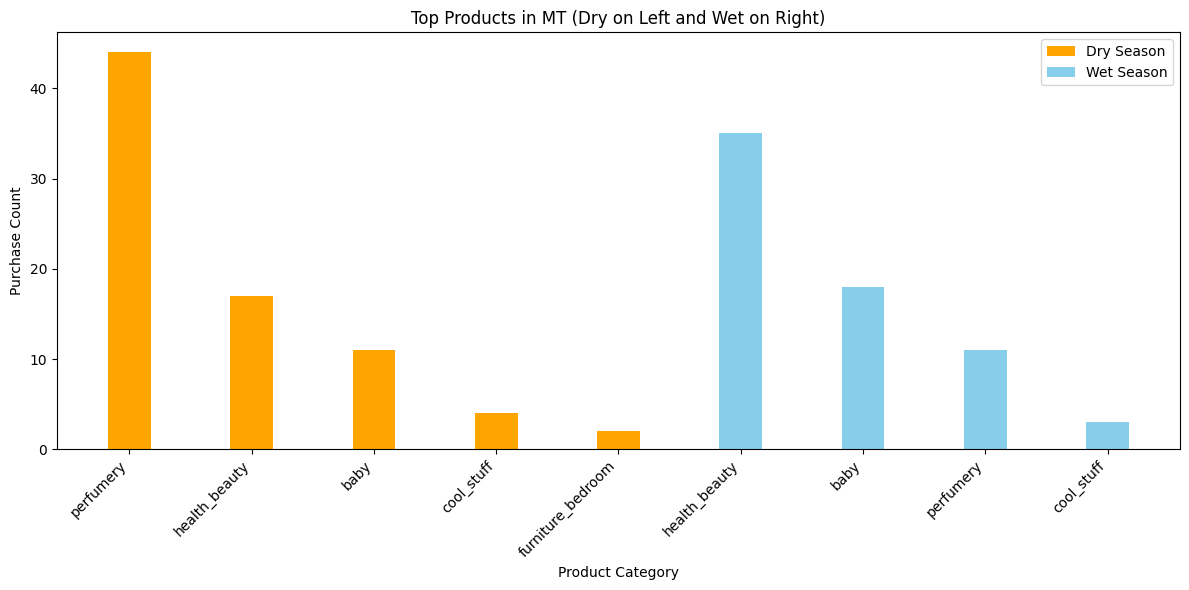

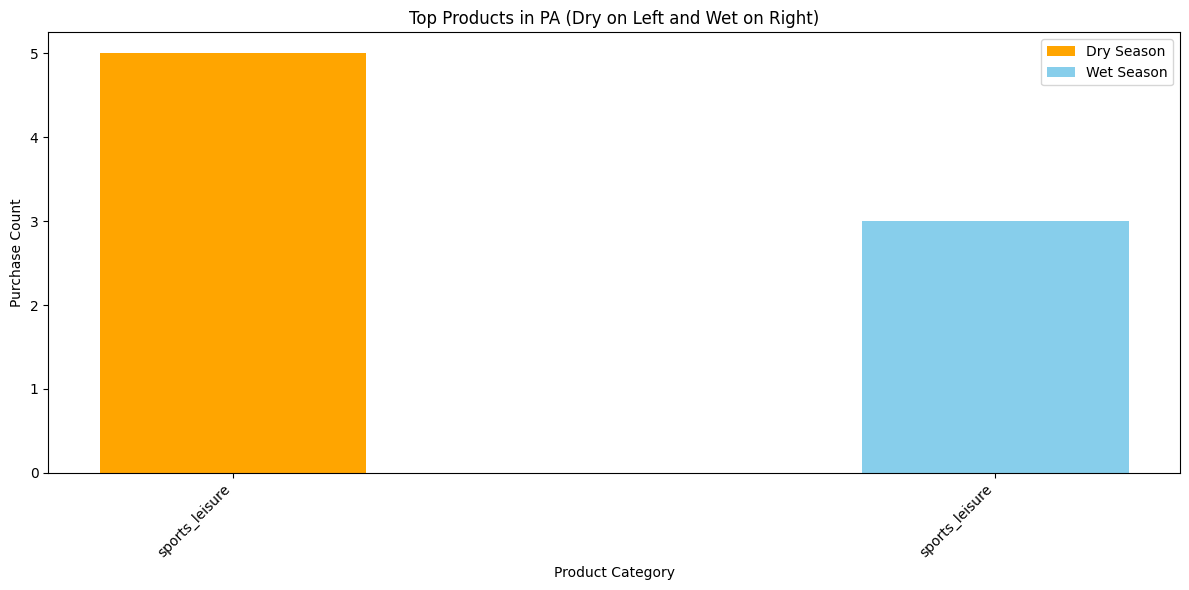

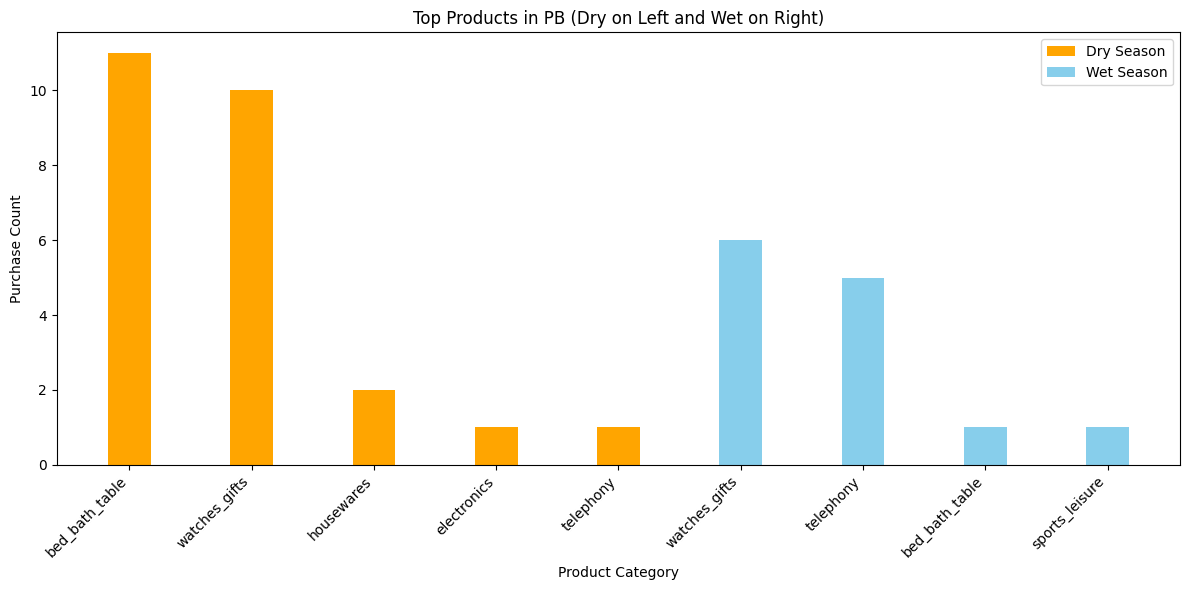

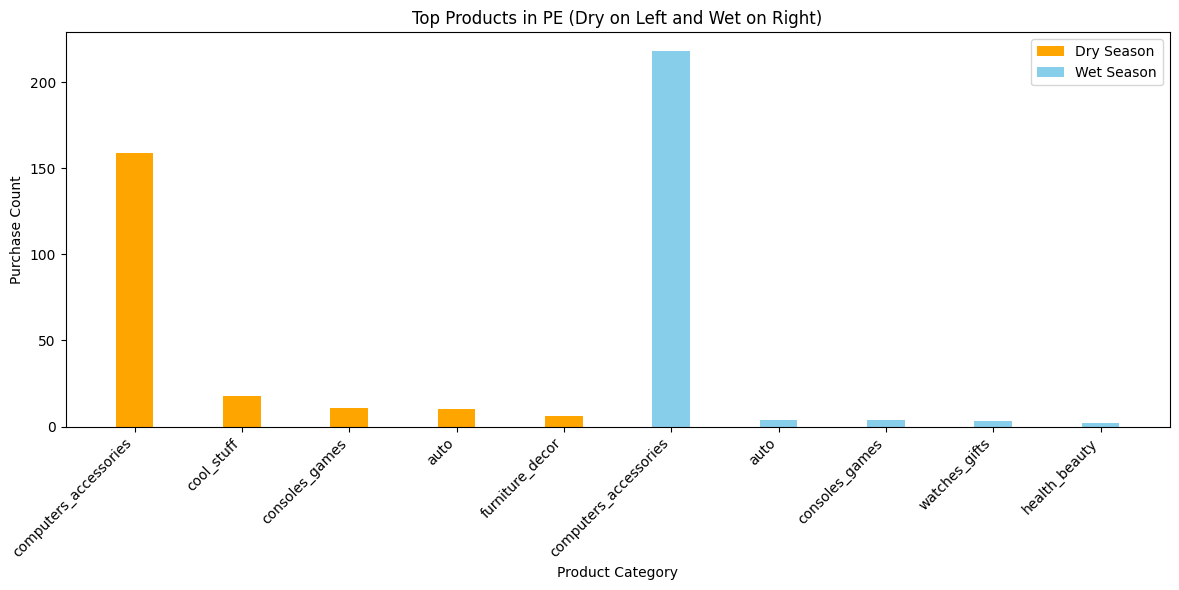

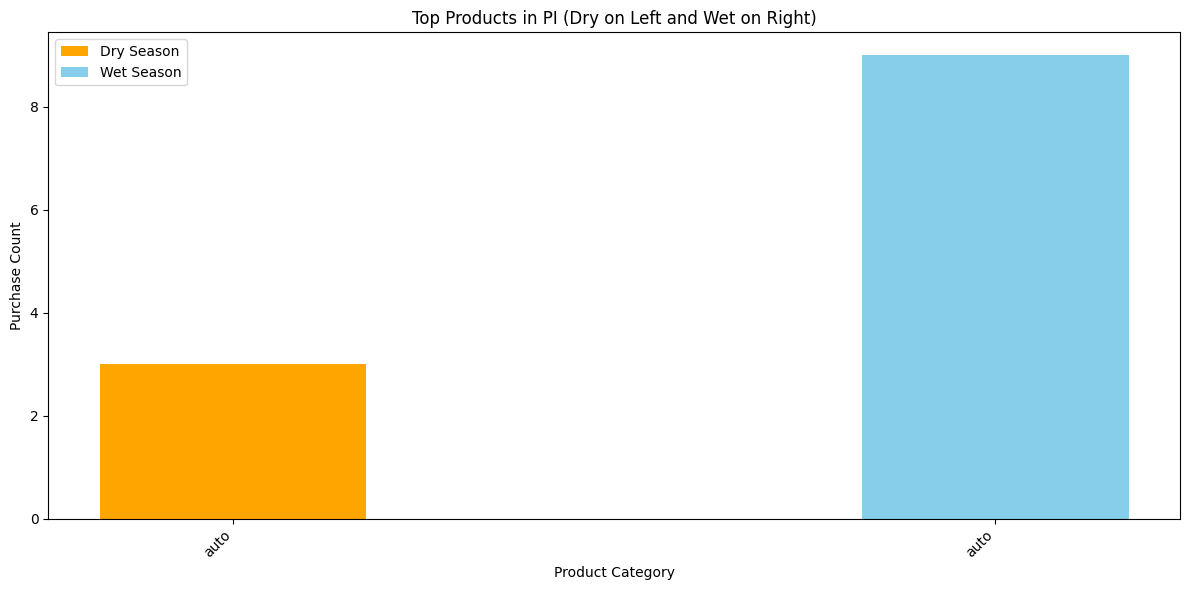

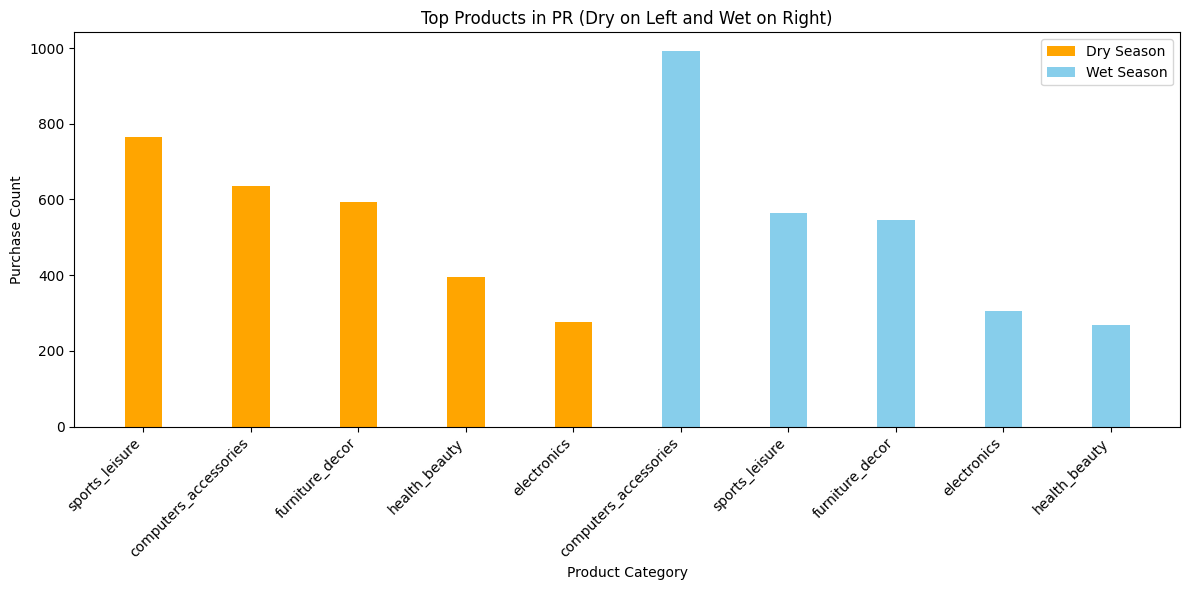

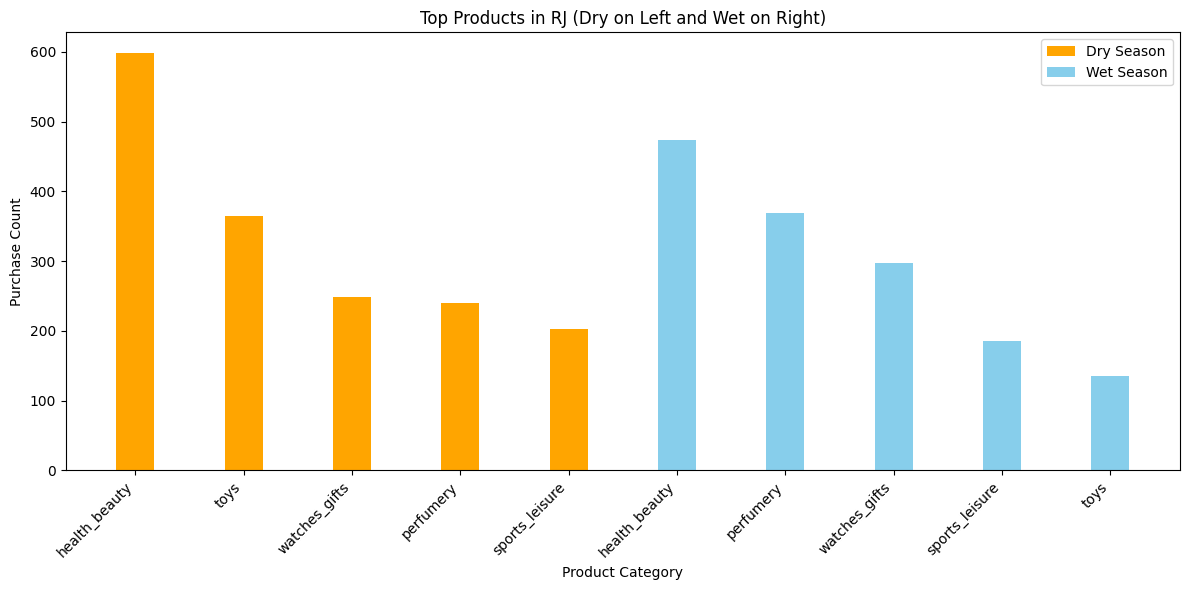

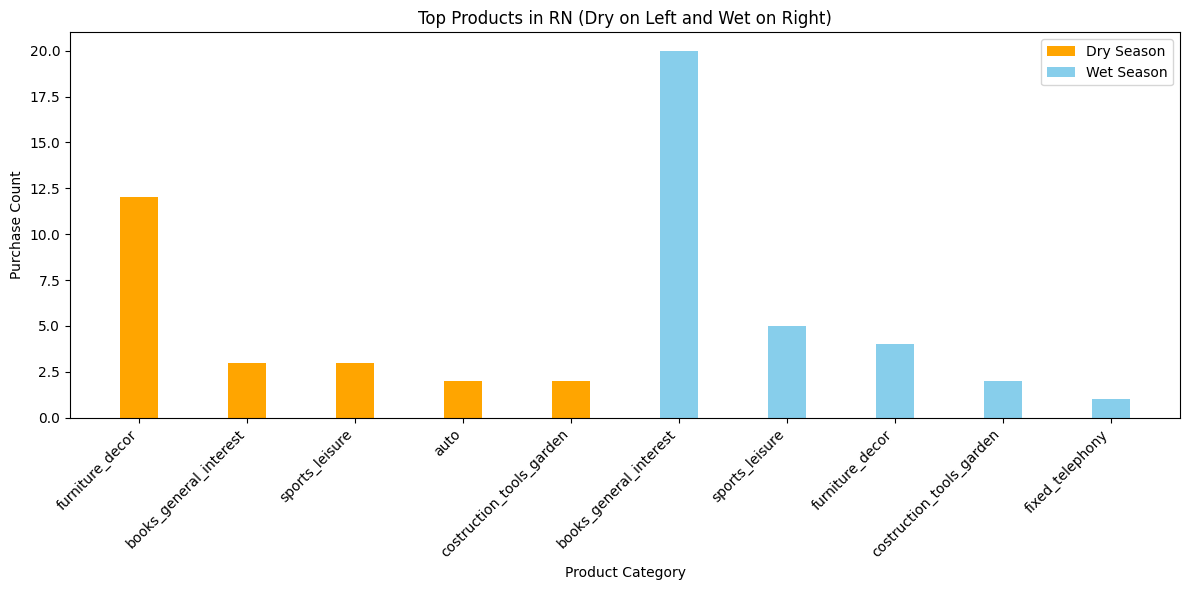

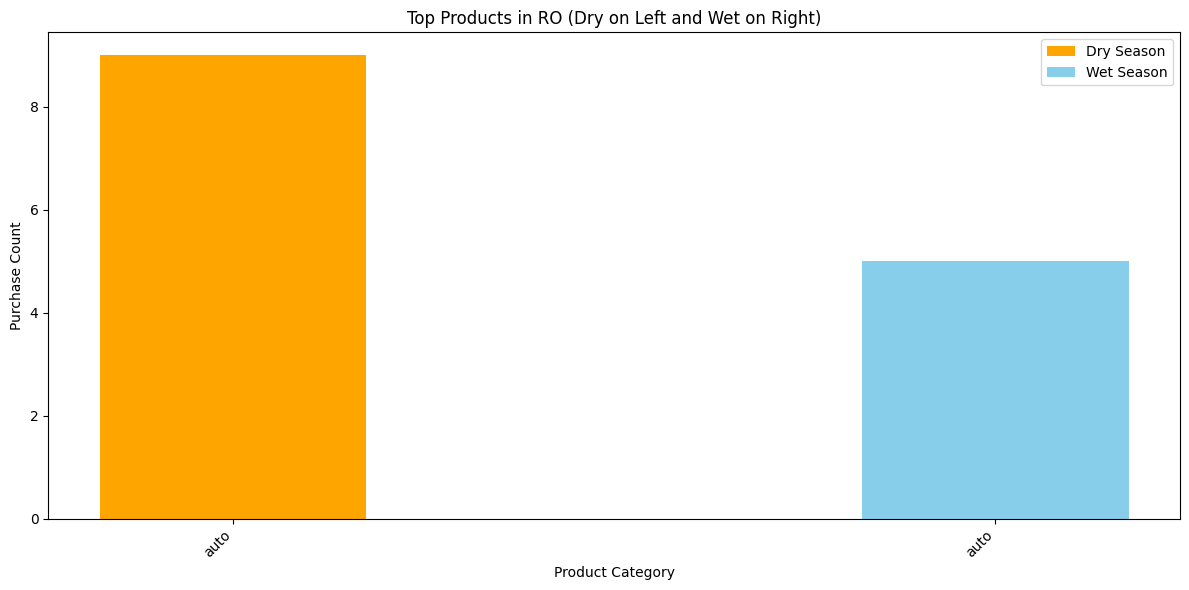

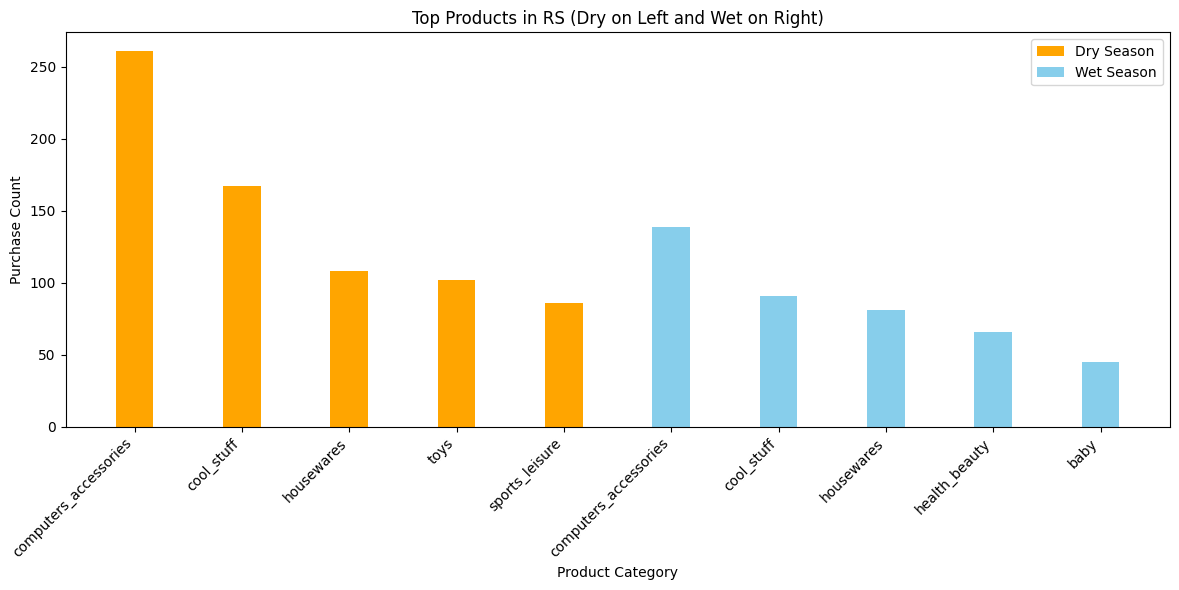

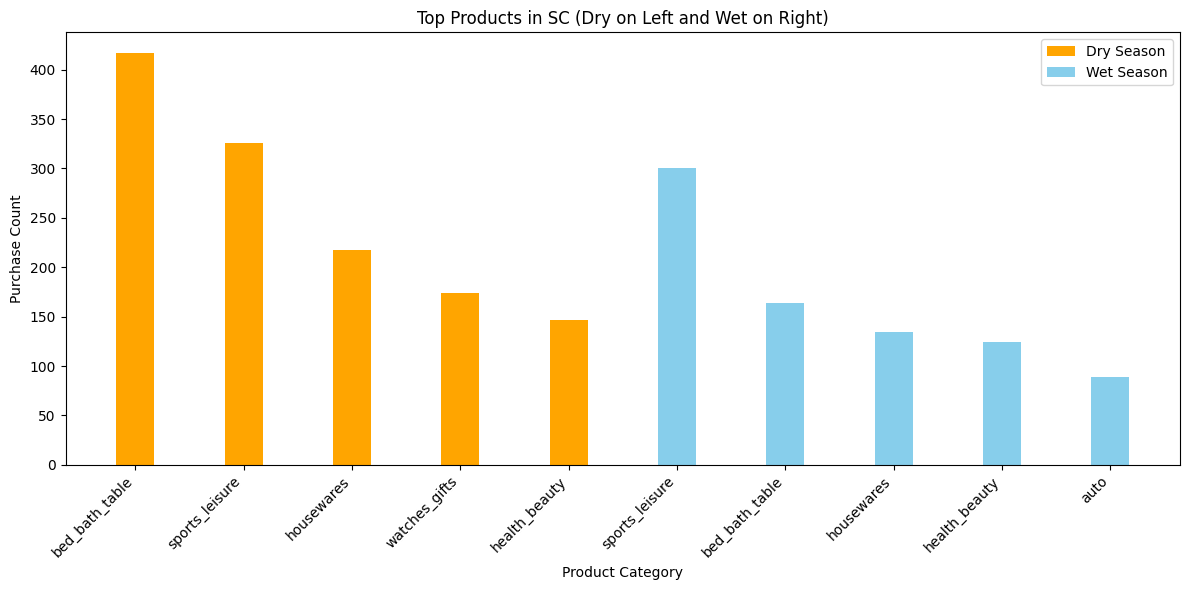

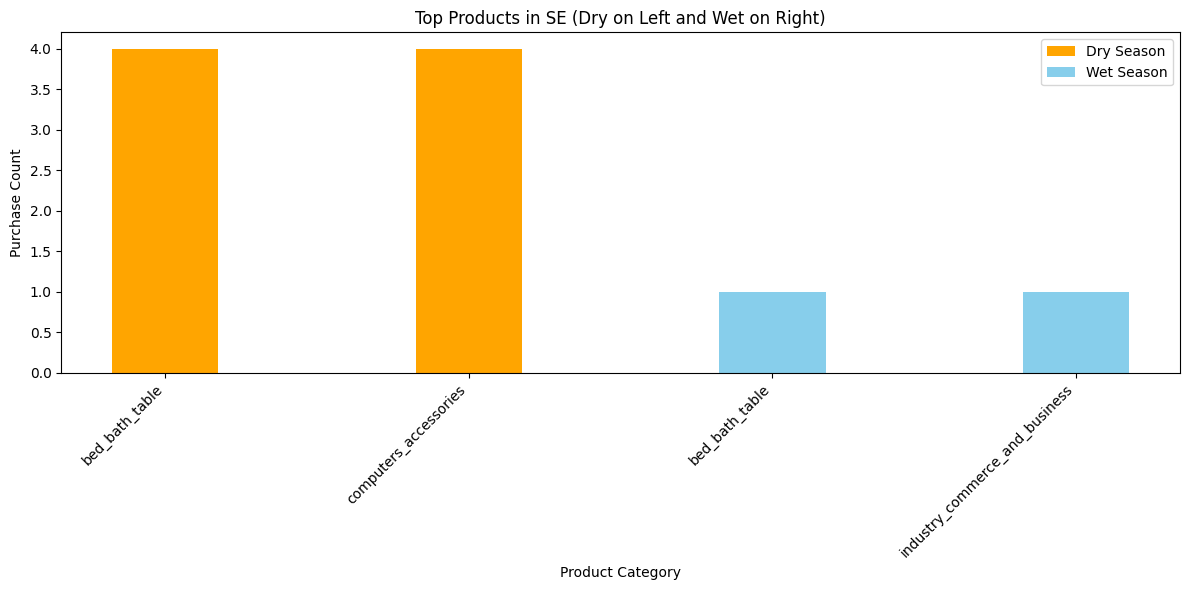

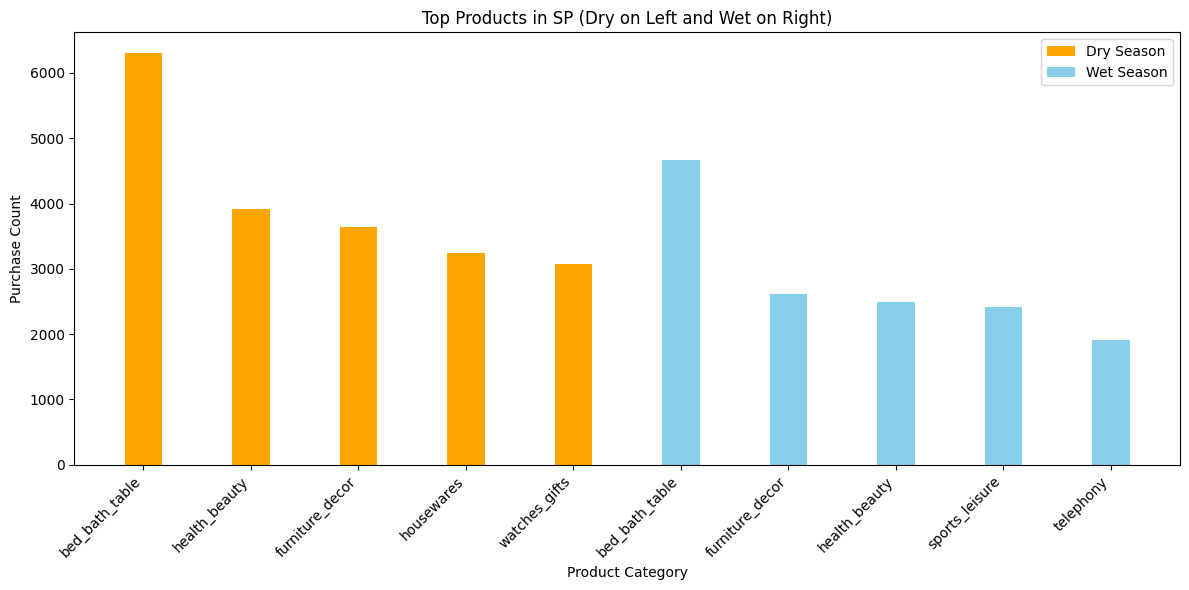

In [98]:
# (Opsional) Visualisasi
# Loop melalui setiap wilayah dan plot grafik batang untuk masing-masing musim
for state in top5_produced_products['seller_state'].unique():
    # Ambil subset untuk masing-masing musim
    subset_wet = top5_produced_products[
        (top5_produced_products['seller_state'] == state) & (top5_produced_products['season'] == 'wet')]
    subset_dry = top5_produced_products[
        (top5_produced_products['seller_state'] == state) & (top5_produced_products['season'] == 'dry')]

    # Buat array untuk posisi batang
    bar_width = 0.35
    indices_dry = np.arange(len(subset_dry))  # Posisi untuk dry season
    indices_wet = np.arange(len(subset_wet)) + len(subset_dry)  # Posisi untuk wet season, offset dengan panjang dry season

    # Plot batang
    plt.figure(figsize=(12, 6))

    plt.bar(indices_dry, subset_dry['count'], width=bar_width, label='Dry Season', color='orange', align='center')
    plt.bar(indices_wet, subset_wet['count'], width=bar_width, label='Wet Season', color='skyblue', align='center')

    # Set label, judul, dan sumbu x
    plt.xlabel('Product Category')
    plt.ylabel('Purchase Count')
    plt.title(f'Top Products in {state} (Dry on Left and Wet on Right)')

    # Gabungkan kategori produk untuk kedua musim dan atur ticks
    all_categories = np.concatenate([subset_dry['product_category_name'].values, subset_wet['product_category_name'].values])
    plt.xticks(np.concatenate([indices_dry, indices_wet]), all_categories, rotation=45, ha='right')

    # Tampilkan legenda
    plt.legend()

    # Tampilkan grafik
    plt.tight_layout()
    plt.show()


3. Berapa pengeluaran seluruh state pada musim hujan dan kemarau?

total pengeluaran pelanggan berdasarkan wilayah (state) untuk musim hujan dan musim kemarau. Grafik batang dibagi menjadi dua sub-plot: satu untuk musim hujan (berwarna biru) dan satu lagi untuk musim kemarau (berwarna oranye). Setiap batang mewakili total pengeluaran pelanggan di masing-masing wilayah selama musim tersebut, dengan sumbu x menunjukkan wilayah dan sumbu y menunjukkan total pengeluaran. 

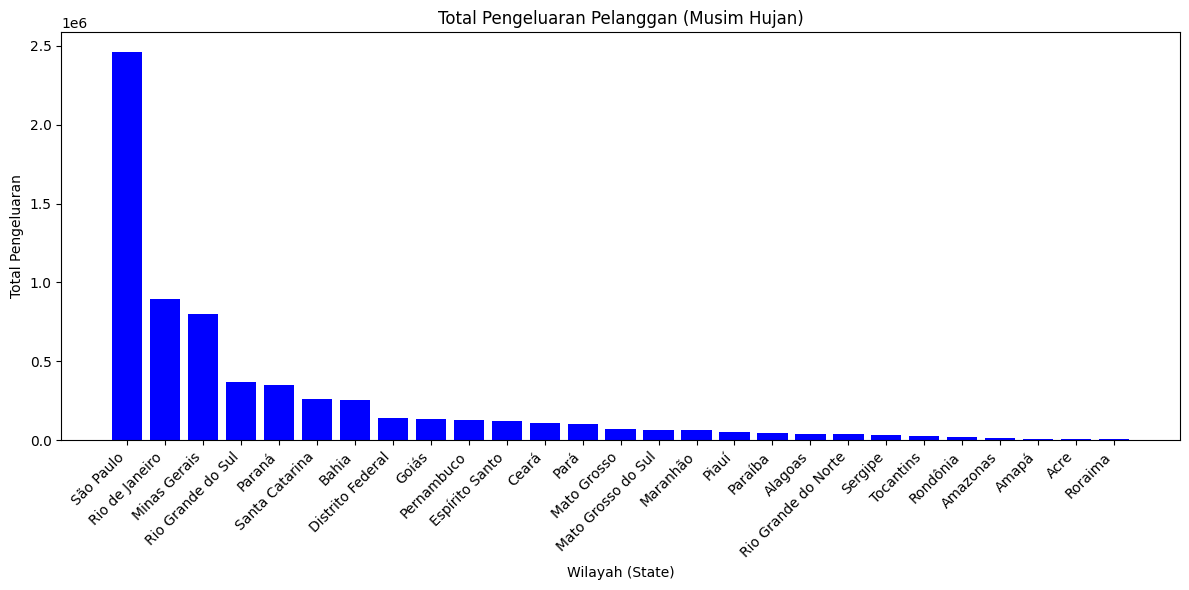

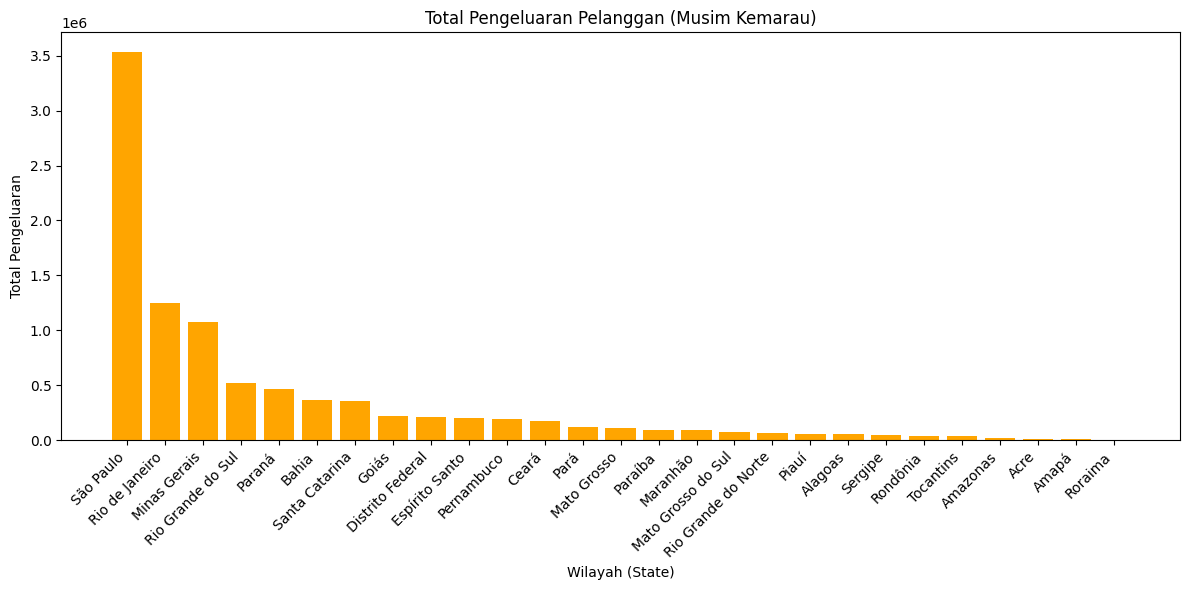

In [107]:
# Dictionary untuk mengganti nama state
state_names = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

# Mengganti nama singkatan state dengan nama lengkapnya
total_wet['customer_state'] = total_wet['customer_state'].map(state_names)
total_dry['customer_state'] = total_dry['customer_state'].map(state_names)

# Mengurutkan data dari total pengeluaran tertinggi hingga terendah
total_wet_sorted = total_wet.sort_values(by='total_expenditure', ascending=False)
total_dry_sorted = total_dry.sort_values(by='total_expenditure', ascending=False)

# Plot Musim Hujan
plt.figure(figsize=(12, 6))
plt.bar(total_wet_sorted['customer_state'], total_wet_sorted['total_expenditure'], color='blue')
plt.title('Total Pengeluaran Pelanggan (Musim Hujan)')
plt.xlabel('Wilayah (State)')
plt.ylabel('Total Pengeluaran')
plt.xticks(rotation=45, ha='right')  # Mengatur rotasi dan posisi label agar lebih mudah dibaca
plt.tight_layout()
plt.show()

# Plot Musim Kemarau
plt.figure(figsize=(12, 6))
plt.bar(total_dry_sorted['customer_state'], total_dry_sorted['total_expenditure'], color='orange')
plt.title('Total Pengeluaran Pelanggan (Musim Kemarau)')
plt.xlabel('Wilayah (State)')
plt.ylabel('Total Pengeluaran')
plt.xticks(rotation=45, ha='right')  # Mengatur rotasi dan posisi label agar lebih mudah dibaca
plt.tight_layout()
plt.show()


#### Conclusion

1. 5 Barang terbanyak apakah yang dibeli di semua state dalam rentang musim hujan dan kemarau?

Barang-barang termasuk sering muncul dalam list ini adalah sports_leisure, furniture_decor, health_beauty, computer accessories, telephony, bed bath table. Penjualan barang saat dry season, cenderung lebih tinggi dibandingkan saat wet season. Dapat disimpulkan, barang-barang yang dibeli masyarakat adalah barang-barang kebutuhan sehari-hari.  

2. 5 Barang terbanyak apakah yang terjual dari semua state dalam rentang musim hujan dan kemarau?

Tidak jauh berbeda dengan barang yang dibeli, barang yang terjual oleh setiap state juga didominasi barang kebutuhan sehari-hari. Namun, ada beberapa wilayah seperti Mato Grosso yang komoditasnya adalah aksesoris computer dan Mato Grosso yang memiliki komoditas Utama di bidang auto (automotive). 

3. Berapa pengeluaran seluruh state pada musim hujan dan kemarau?	

Dari semua state, São Paulo memiliki pengeluaran total tertinggi di antara negara bagian di Brasil, sebagian besar karena posisinya sebagai pusat ekonomi Brasil. Sebagai negara bagian dengan PDB terbesar, São Paulo berfungsi sebagai pusat utama industri, perdagangan, dan jasa, yang mendorong aktivitas ekonomi yang signifikan. Populasi yang besar, yang merupakan yang tertinggi di Brasil, secara alami mengarah pada konsumsi barang dan jasa yang lebih besar. 

#### End of Process (Export for Streamlit Purpose)

In [100]:
top5_purchased_products.head(1)

,customer_state,season,product_category_name_english,purchase_count
0,AC,Dry Season,furniture_decor,8


In [101]:
top5_produced_products.head(1)


,seller_state,season,product_category_name,count
0,AC,dry,books_technical,1


In [102]:
total_spending.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


menyimpan tiga DataFrame ke dalam file berformat .pkl. Tiga DataFrame tersebut adalah top5_purchased_products, top5_produced_products, dan total_spending. Masing-masing disimpan ke file bernama top5_purchased_products.pkl, top5_produced_products.pkl, dan top5_spending_state.pkl. Hal ini memungkinkan DataFrame disimpan dan diambil kembali nanti tanpa harus rebuild

In [103]:
import pickle

with open('top5_purchased_products.pkl', 'wb') as file:
    pickle.dump(top5_purchased_products, file)

with open('top5_produced_products.pkl', 'wb') as file:
    pickle.dump(top5_produced_products, file)

with open('top5_spending_state.pkl', 'wb') as file:
    pickle.dump(total_spending, file)
